In [1]:
import numpy as np
import pandas as pd

feature_o=pd.read_csv('./tmp/cafe_features_300m.csv')
feature_o['zone']=feature_o['addr'].copy()
feature_o['zone']=feature_o['zone'].str.split('區',expand=True).drop([1,2], axis=1)
feature = feature_o.loc[:,'density_2021':'train'].fillna(0)
feature

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
0,30537.582094,-1.038945,3844691,3,1.0,0.0,0.0,2.0,0.0,55.0,1.0,5.0,9.0,1.0,19.0,0.0
1,34199.348503,-1.879027,1857272,5,0.0,2.0,1.0,0.0,1.0,70.0,1.0,6.0,14.0,0.0,12.0,0.0
2,16690.778379,-0.500099,2769267,3,1.0,2.0,0.0,2.0,0.0,0.0,1.0,7.0,7.0,1.0,13.0,0.0
3,30029.689819,-0.402234,2750941,2,2.0,2.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,0.0,24.0,0.0
4,37267.488548,-1.043902,1839588,3,1.0,0.0,1.0,0.0,0.0,39.0,0.0,10.0,9.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,33846.823431,-0.448332,904809,1,1.0,6.0,1.0,2.0,0.0,105.0,0.0,7.0,0.0,0.0,1.0,0.0
669,15354.918545,-0.271195,2131815,1,1.0,2.0,0.0,1.0,0.0,34.0,0.0,7.0,1.0,0.0,0.0,0.0
670,4921.167930,-2.656622,77812,2,3.0,2.0,0.0,1.0,0.0,59.0,2.0,3.0,1.0,0.0,0.0,0.0
671,6298.055230,7.973902,991876,1,0.0,1.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0


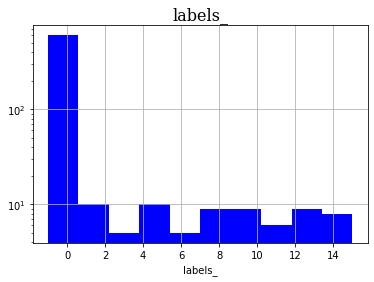

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import numpy as np

scaler = MinMaxScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=1, metric='cityblock', min_samples=4).fit(X)

# 存模型
# clf = pickle.dumps(clustering)

# dump(clf, 'MinMaxnearby200m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()

set(clustering.labels_)

In [3]:
feature_o['labels'] = list(clustering.labels_)

In [4]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,3,1.0,0.0,...,0.0,55.0,1.0,5.0,9.0,1.0,19.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,5,0.0,2.0,...,1.0,70.0,1.0,6.0,14.0,0.0,12.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,1.0,2.0,...,0.0,0.0,1.0,7.0,7.0,1.0,13.0,0.0,台北市中山,0
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,2,2.0,2.0,...,0.0,0.0,1.0,8.0,6.0,0.0,24.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,3,1.0,0.0,...,0.0,39.0,0.0,10.0,9.0,0.0,5.0,0.0,台北市中山,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,1.0,6.0,...,0.0,105.0,0.0,7.0,0.0,0.0,1.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,1.0,2.0,...,0.0,34.0,0.0,7.0,1.0,0.0,0.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,59.0,2.0,3.0,1.0,0.0,0.0,0.0,新北市金山,0
671,85 cafe,新北市鶯歌區鶯桃路656號,24.969223,121.329193,6298.055230,7.973902,991876,1,0.0,1.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市鶯歌,0


In [5]:
df_0 = feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']

df_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,29548.320402,-0.289288,2.428456e+06,2.246781,1.555794,1.776824,0.937768,1.070815,0.227468,48.113734,1.094421,6.199571,3.753219,0.111588,5.360515,0.0
std,19902.839810,2.157205,1.738257e+06,1.175576,1.653312,1.752902,0.960729,1.136551,0.454105,50.639459,1.450136,2.930169,4.114130,0.335041,5.617835,0.0
min,620.705292,-4.033235,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,11876.033332,-1.314009,1.259438e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.0
50%,29205.040899,-0.799581,2.009567e+06,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,34.500000,1.000000,6.000000,2.000000,0.000000,3.000000,0.0
75%,41672.295462,-0.140642,2.898483e+06,3.000000,2.000000,3.000000,2.000000,2.000000,0.000000,70.750000,2.000000,8.000000,6.000000,0.000000,9.000000,0.0
max,110994.346742,10.359882,1.057882e+07,8.000000,8.000000,8.000000,6.000000,5.000000,2.000000,268.000000,7.000000,18.000000,22.000000,2.000000,37.000000,0.0


In [6]:
df_0.median()

density_2021      2.920504e+04
ave_pop_growth   -7.995811e-01
2019_income       2.009567e+06
chain_cafe        2.000000e+00
breakfast         1.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          3.450000e+01
parking_space     1.000000e+00
CVS               6.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

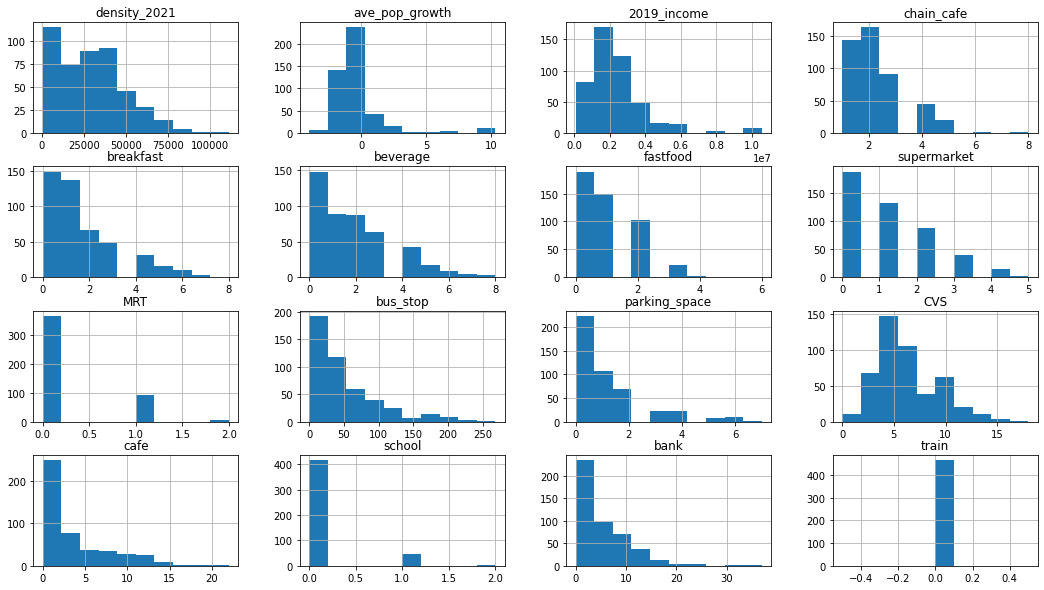

In [7]:
df_0.hist(figsize=(18, 10));

# 大部分人口密度(29205.04)
# 人口大多緩步負成長(-0.7995811)
# 年收均值(2009567)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(1)
# 速食餐廳(1)
# 超市(1)
# 捷運(0)
# 停車場(1)
# CVS(6)
# cafe(2)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(34.5)站

In [8]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
6,cama,台北市中山區民生東路一段2號,25.057835,121.523249,40836.413198,-0.122100,2793229,3,3.0,2.0,...,1.0,29.0,1.0,20.0,9.0,0.0,17.0,0.0,台北市中山,-1
9,cama,台北市中山區中山北路三段25之10號,25.065187,121.522484,49924.217762,-0.584791,2439490,4,0.0,4.0,...,0.0,28.0,0.0,10.0,6.0,2.0,7.0,0.0,台北市中山,-1
10,cama,台北市中山區長春路366號,25.054472,121.542608,70650.640354,-1.100691,2228394,3,6.0,1.0,...,2.0,20.0,4.0,10.0,12.0,0.0,16.0,0.0,台北市中山,-1
15,cama,台北市中正區襄陽路35號,25.043533,121.513723,5734.296784,0.585770,1631191,5,1.0,6.0,...,0.0,97.0,0.0,17.0,11.0,1.0,43.0,0.0,台北市中正,-1
25,cama,台北市信義區基隆路二段195號,25.024725,121.553191,20686.321333,-1.997238,1702836,3,6.0,1.0,...,1.0,7.0,0.0,5.0,13.0,1.0,2.0,0.0,台北市信義,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,85 cafe,新北市樹林區中山路一段94號1F,24.991271,121.423167,35662.729822,-0.800880,1579911,5,5.0,10.0,...,0.0,112.0,0.0,8.0,3.0,0.0,9.0,1.0,新北市樹林,-1
658,85 cafe,新北市汐止區樟樹一路121號,25.064361,121.641977,19265.874578,0.365886,2458129,1,0.0,2.0,...,0.0,32.0,1.0,5.0,0.0,1.0,0.0,0.0,新北市汐止,-1
659,85 cafe,新北市汐止區建成路37巷1號,25.072748,121.663666,37822.255842,0.472579,1531175,2,5.0,0.0,...,0.0,58.0,4.0,8.0,1.0,0.0,0.0,0.0,新北市汐止,-1
663,85 cafe,新北市淡水區中山北路一段149巷15號,25.177600,121.442849,31200.839681,-1.180762,883952,1,1.0,2.0,...,0.0,286.0,2.0,3.0,3.0,0.0,2.0,0.0,新北市淡水,-1


In [9]:
df_i1 = feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
df_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,30592.683404,-0.355113,2.449804e+06,3.036765,2.272059,3.345588,1.757353,1.338235,0.588235,73.919118,1.669118,8.757353,7.301471,0.389706,8.727941,0.102941
std,19255.045701,2.649474,1.692023e+06,1.819272,2.172102,2.614429,1.727753,1.501706,0.693575,81.287150,1.951467,5.088107,7.682901,0.518870,9.237979,0.305005
min,1318.101678,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,15070.399220,-1.488563,1.266282e+06,2.000000,0.750000,1.000000,0.750000,0.000000,0.000000,5.750000,0.000000,5.000000,2.000000,0.000000,3.000000,0.000000
50%,27288.976004,-0.785786,1.853650e+06,3.000000,1.000000,3.000000,2.000000,1.000000,0.000000,52.000000,1.000000,7.000000,5.000000,0.000000,6.000000,0.000000
75%,44632.575508,0.376443,3.394181e+06,4.000000,4.000000,5.000000,2.000000,2.000000,1.000000,112.000000,2.000000,11.000000,11.000000,1.000000,11.000000,0.000000
max,76862.613562,12.415476,1.057882e+07,9.000000,9.000000,10.000000,9.000000,7.000000,2.000000,423.000000,10.000000,26.000000,40.000000,2.000000,48.000000,1.000000


In [10]:
df_i1.median()

density_2021      2.728898e+04
ave_pop_growth   -7.857860e-01
2019_income       1.853650e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          3.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          5.200000e+01
parking_space     1.000000e+00
CVS               7.000000e+00
cafe              5.000000e+00
school            0.000000e+00
bank              6.000000e+00
train             0.000000e+00
dtype: float64

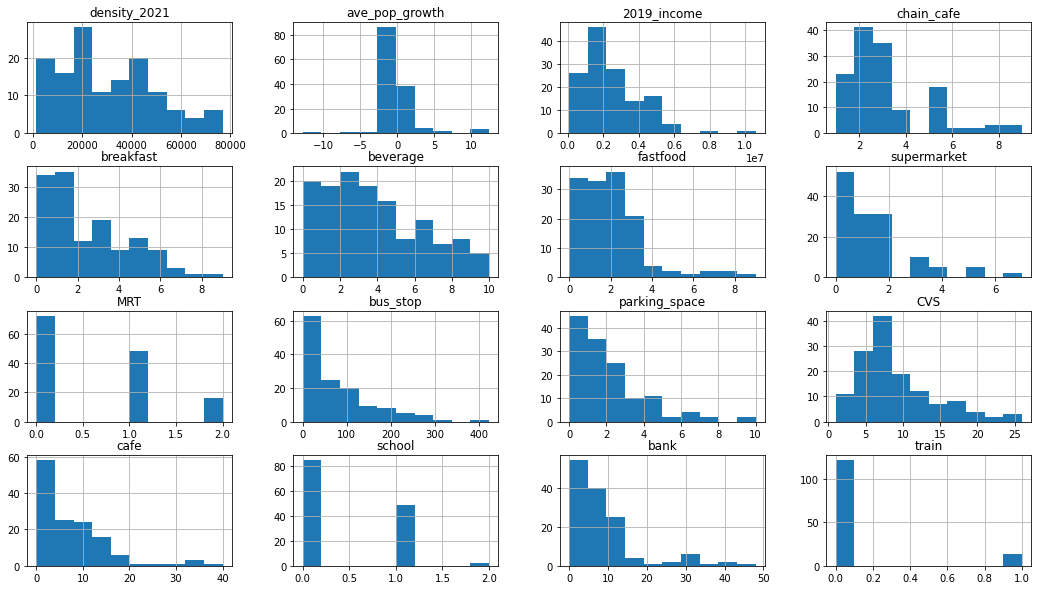

In [11]:
df_i1.hist(figsize=(18, 10));

# 大部分人口密度(27288.98)
# 人口大多緩步負成長(-0.7857860)
# 年收均值(1853650)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(3)
# 速食餐廳(2)
# 超市(1)
# 捷運(0)
# 停車場(1)
# CVS(7)
# cafe(5)
# school(0)
# 銀行(6)
# 火車站(0)
# 巴士站至少(52)站

In [12]:
df_1 = feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']

In [13]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
11,cama,台北市中正區新生南路一段90號,25.040386,121.532560,26122.241810,-2.37891,2834326,3,1.0,3.0,...,2.0,4.0,3.0,6.0,8.0,0.0,14.0,0.0,台北市中正,1
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.05916,2650936,4,3.0,5.0,...,2.0,29.0,0.0,5.0,11.0,0.0,14.0,0.0,台北市中正,1
85,louisa,台北市臨沂街27巷9-4號,25.041235,121.531428,26122.241810,-2.37891,2834326,4,1.0,5.0,...,2.0,4.0,3.0,8.0,9.0,0.0,13.0,0.0,台北市臨沂街27巷9-4號,1
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,24.0,0.0,4.0,8.0,0.0,12.0,0.0,台北市中正,1
369,stbks,台北市中正區忠孝東路二段134巷2號,25.041964,121.531706,26122.241810,-2.37891,2834326,4,1.0,5.0,...,2.0,2.0,3.0,10.0,12.0,0.0,13.0,0.0,台北市中正,1
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,23.0,0.0,3.0,10.0,0.0,12.0,0.0,台北市中正,1


In [14]:
df_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.0
mean,26068.185734,-3.219035,2.742631e+06,3.500000,2.000000,4.666667,1.666667,1.0,2.0,14.333333,1.500000,6.000000,9.666667,0.0,13.000000,0.0
std,59.215464,0.920311,1.004468e+05,0.547723,1.095445,0.816497,0.516398,0.0,0.0,12.242004,1.643168,2.607681,1.632993,0.0,0.894427,0.0
min,26014.129659,-4.059160,2.650936e+06,3.000000,1.000000,3.000000,1.000000,1.0,2.0,2.000000,0.000000,3.000000,8.000000,0.0,12.000000,0.0
25%,26014.129659,-4.059160,2.650936e+06,3.000000,1.000000,5.000000,1.250000,1.0,2.0,4.000000,0.000000,4.250000,8.250000,0.0,12.250000,0.0
50%,26068.185734,-3.219035,2.742631e+06,3.500000,2.000000,5.000000,2.000000,1.0,2.0,13.500000,1.500000,5.500000,9.500000,0.0,13.000000,0.0
75%,26122.241810,-2.378910,2.834326e+06,4.000000,3.000000,5.000000,2.000000,1.0,2.0,23.750000,3.000000,7.500000,10.750000,0.0,13.750000,0.0
max,26122.241810,-2.378910,2.834326e+06,4.000000,3.000000,5.000000,2.000000,1.0,2.0,29.000000,3.000000,10.000000,12.000000,0.0,14.000000,0.0


In [15]:
df_1.median()

density_2021      2.606819e+04
ave_pop_growth   -3.219035e+00
2019_income       2.742631e+06
chain_cafe        3.500000e+00
breakfast         2.000000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               2.000000e+00
bus_stop          1.350000e+01
parking_space     1.500000e+00
CVS               5.500000e+00
cafe              9.500000e+00
school            0.000000e+00
bank              1.300000e+01
train             0.000000e+00
dtype: float64

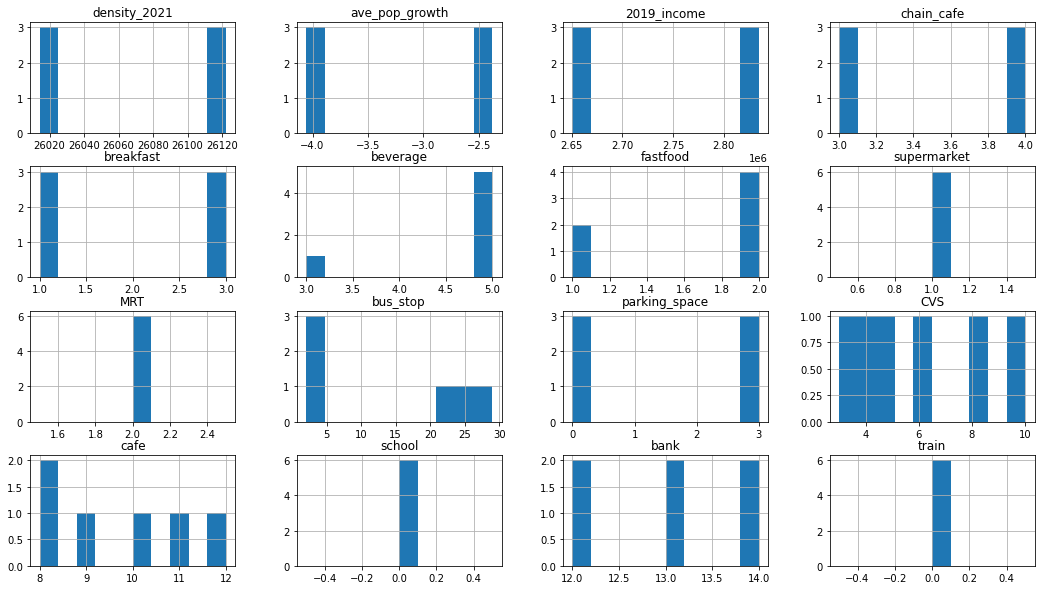

In [16]:
df_1.hist(figsize=(18, 10));

# 大部分人口密度(26068.19)
# 人口大多緩步負成長(-3.219035)
# 年收均值(2742631)
# 平均有(3.5)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(5)
# 速食餐廳(2)
# 超市(1)
# 捷運(2)
# 停車場(1.5)
# CVS(5.5)
# cafe(9.5)
# school(0)
# 銀行(1.3)
# 火車站(0)
# 巴士站至少(13.5)站

In [17]:
df_2 = feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']

In [18]:
df_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.000000,4.00,4.0,4.0,4.00000,4.0,4.000000,4.00,4.00000,4.000000,4.0,4.00,4.0
mean,22399.060766,-2.131716,2435957.0,6.000000,4.25,1.0,1.0,0.50000,1.0,16.500000,1.75,15.50000,12.750000,1.0,29.25,0.0
std,0.000000,0.000000,0.0,0.816497,1.50,0.0,0.0,0.57735,0.0,4.725816,0.50,0.57735,2.362908,0.0,3.50,0.0
min,22399.060766,-2.131716,2435957.0,5.000000,2.00,1.0,1.0,0.00000,1.0,10.000000,1.00,15.00000,11.000000,1.0,24.00,0.0
25%,22399.060766,-2.131716,2435957.0,5.750000,4.25,1.0,1.0,0.00000,1.0,14.500000,1.75,15.00000,11.000000,1.0,29.25,0.0
50%,22399.060766,-2.131716,2435957.0,6.000000,5.00,1.0,1.0,0.50000,1.0,18.000000,2.00,15.50000,12.000000,1.0,31.00,0.0
75%,22399.060766,-2.131716,2435957.0,6.250000,5.00,1.0,1.0,1.00000,1.0,20.000000,2.00,16.00000,13.750000,1.0,31.00,0.0
max,22399.060766,-2.131716,2435957.0,7.000000,5.00,1.0,1.0,1.00000,1.0,20.000000,2.00,16.00000,16.000000,1.0,31.00,0.0


In [19]:
df_2.median()

density_2021      2.239906e+04
ave_pop_growth   -2.131716e+00
2019_income       2.435957e+06
chain_cafe        6.000000e+00
breakfast         5.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       5.000000e-01
MRT               1.000000e+00
bus_stop          1.800000e+01
parking_space     2.000000e+00
CVS               1.550000e+01
cafe              1.200000e+01
school            1.000000e+00
bank              3.100000e+01
train             0.000000e+00
dtype: float64

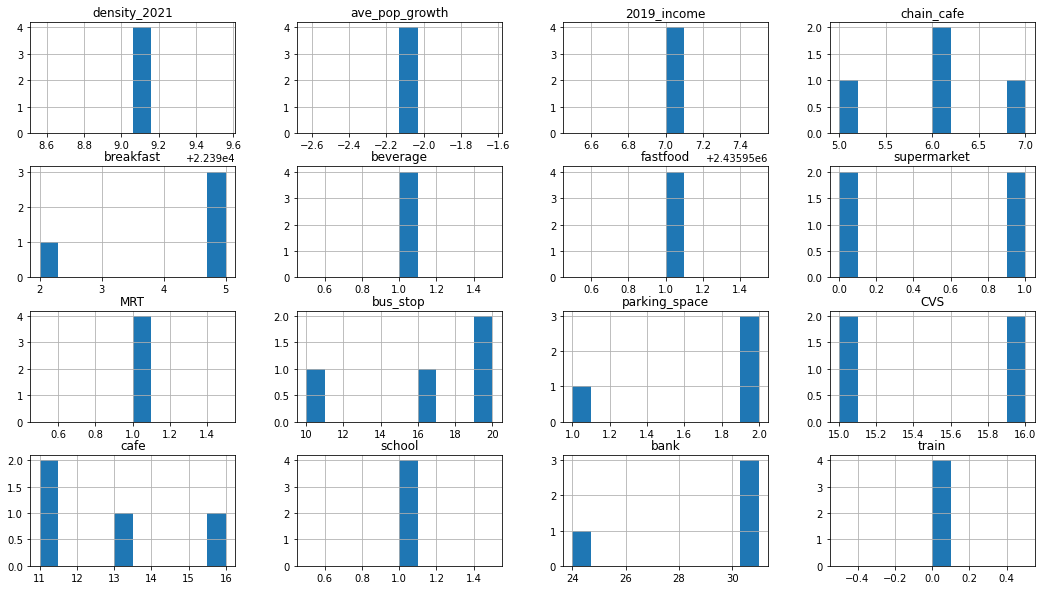

In [20]:
df_2.hist(figsize=(18, 10));

# 大部分人口密度(22399.06)
# 人口大多緩步負成長(-2.131716)
# 年收均值(2435957)
# 平均有(6)間小型咖啡廳
# 沒有早餐店(5)
# 飲料店(1)
# 速食餐廳(1)
# 超市(5)
# 捷運(1)
# 停車場(2)
# CVS(15.5)
# cafe(12)
# school(1)
# 銀行(31)
# 火車站(0)
# 巴士站至少(18)站

In [21]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
21,cama,台北市信義區基隆路一段167號,25.041675,121.565175,22399.060766,-2.131716,2435957,5,5.0,1.0,...,1.0,10.0,1.0,15.0,16.0,1.0,24.0,0.0,台北市信義,2
129,louisa,台北市信義區忠孝東路五段33號,25.041308,121.565943,22399.060766,-2.131716,2435957,7,2.0,1.0,...,1.0,16.0,2.0,15.0,13.0,1.0,31.0,0.0,台北市信義,2
391,stbks,台北市信義區忠孝東路五段8號2F,25.040865,121.565417,22399.060766,-2.131716,2435957,6,5.0,1.0,...,1.0,20.0,2.0,16.0,11.0,1.0,31.0,0.0,台北市信義,2
397,stbks,台北市信義區忠孝東路5段8號B2,25.040865,121.565417,22399.060766,-2.131716,2435957,6,5.0,1.0,...,1.0,20.0,2.0,16.0,11.0,1.0,31.0,0.0,台北市信義,2


In [22]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,27.0,0.0,6.0,1.0,0.0,2.0,1.0,台北市南港,3


In [23]:
df_3 = feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']

In [24]:
df_3.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             7.000000
breakfast              0.000000
beverage               2.000000
fastfood               2.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              23.000000
parking_space          0.000000
CVS                    5.000000
cafe                   2.000000
school                 0.000000
bank                   2.000000
train                  1.000000
dtype: float64

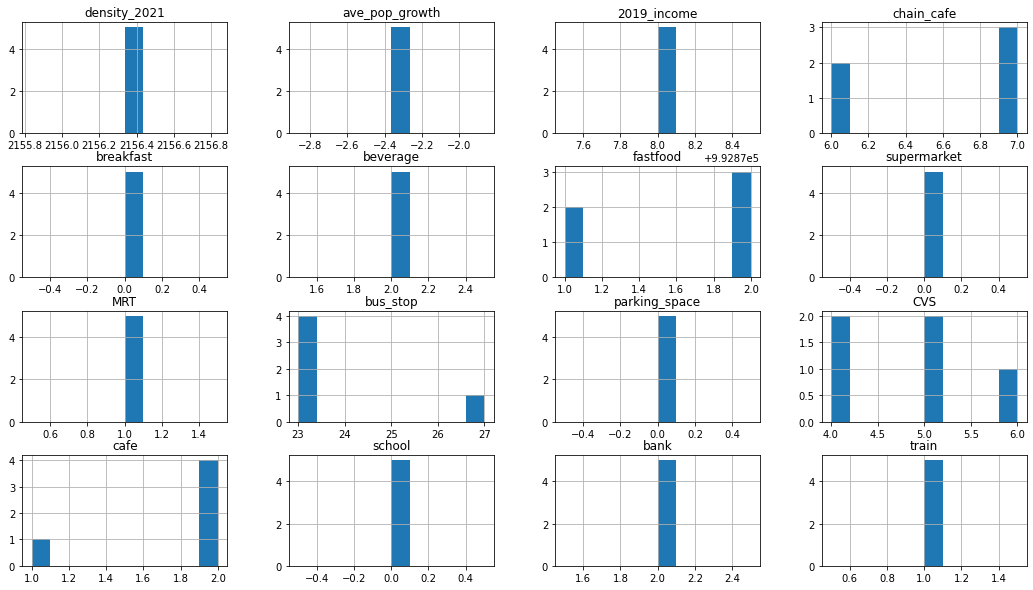

In [25]:
df_3.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(5)
# cafe(2)
# school(0)
# 銀行(2)
# 火車站(1)
# 巴士站至少(23)站

In [26]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
45,cama,台北市大安區信義路二段52號,25.034479,121.525865,32501.768513,1.728813,2246154,4,0.0,0.0,...,2.0,6.0,0.0,6.0,7.0,1.0,9.0,0.0,台北市大安,4
77,louisa,台北市南昌路二段115號,25.026423,121.521719,34871.137382,-1.746928,1389956,4,0.0,4.0,...,2.0,12.0,0.0,7.0,10.0,1.0,9.0,0.0,台北市南昌路二段115號,4
181,louisa,台北市大安區和平東路一段79號,25.027054,121.525280,58404.544125,0.040689,3539366,3,0.0,1.0,...,2.0,3.0,0.0,4.0,5.0,1.0,9.0,0.0,台北市大安,4
189,louisa,台北市大安區信義路四段28號,25.033165,121.544462,37166.866162,-2.460770,2335518,3,0.0,4.0,...,2.0,0.0,3.0,9.0,13.0,1.0,8.0,0.0,台北市大安,4
577,85 cafe,台北市中正區同安街57號,25.024170,121.521837,49837.692681,-1.285802,2652823,3,0.0,3.0,...,2.0,6.0,0.0,8.0,7.0,1.0,6.0,0.0,台北市中正,4


In [27]:
df_4 = feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']

In [28]:
df_4.median()

density_2021      3.716687e+04
ave_pop_growth   -1.285802e+00
2019_income       2.335518e+06
chain_cafe        3.000000e+00
breakfast         0.000000e+00
beverage          3.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               2.000000e+00
bus_stop          6.000000e+00
parking_space     0.000000e+00
CVS               7.000000e+00
cafe              7.000000e+00
school            1.000000e+00
bank              9.000000e+00
train             0.000000e+00
dtype: float64

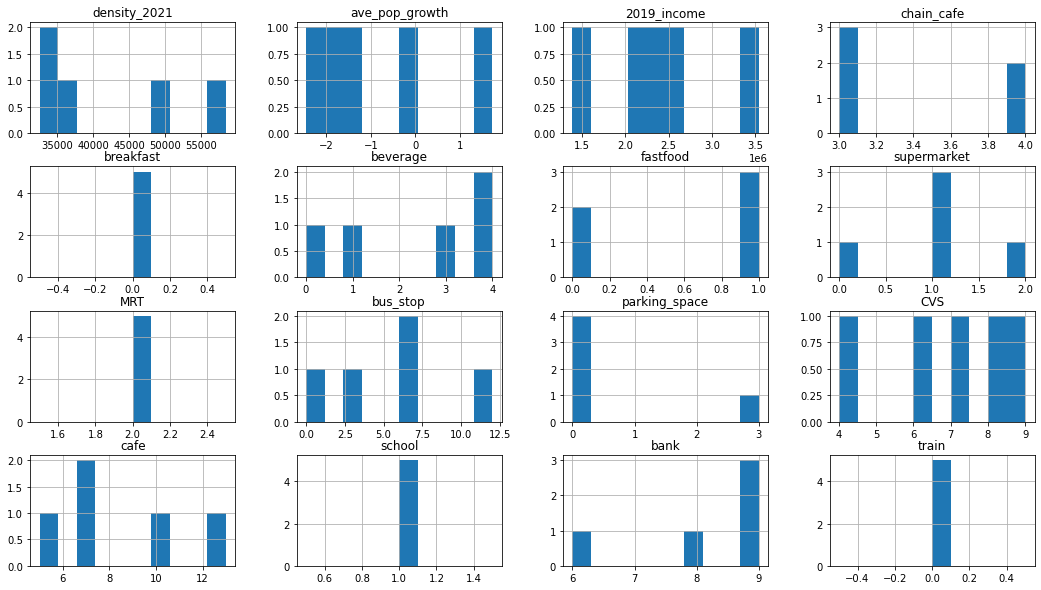

In [29]:
df_4.hist(figsize=(18, 10));

# 大部分人口密度(37166.87)
# 人口大多緩步負成長(-1.285802)
# 年收均值(2335518)
# 平均有(3)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(3)
# 速食餐廳(1)
# 超市(1)
# 捷運(2)
# 停車場(0)
# CVS(7)
# cafe(7)
# school(1)
# 銀行(9)
# 火車站(0)
# 巴士站至少(6)站

In [30]:
df_5 = feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
df_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.000000,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.00000,5.0,5.000000,5.0
mean,37078.099449,-1.534171,3.295960e+06,5.400000,6.80000,3.400000,1.400000,2.200000,2.0,3.400000,0.0,10.000000,8.20000,0.0,7.200000,0.0
std,118.768960,0.091724,7.764903e+05,0.547723,1.30384,1.341641,0.547723,0.447214,0.0,0.894427,0.0,1.224745,1.48324,0.0,1.095445,0.0
min,36865.639075,-1.698251,1.906932e+06,5.000000,6.00000,1.000000,1.000000,2.000000,2.0,2.000000,0.0,9.000000,6.00000,0.0,6.000000,0.0
25%,37131.214542,-1.493150,3.643217e+06,5.000000,6.00000,4.000000,1.000000,2.000000,2.0,3.000000,0.0,9.000000,8.00000,0.0,7.000000,0.0
50%,37131.214542,-1.493150,3.643217e+06,5.000000,6.00000,4.000000,1.000000,2.000000,2.0,4.000000,0.0,10.000000,8.00000,0.0,7.000000,0.0
75%,37131.214542,-1.493150,3.643217e+06,6.000000,7.00000,4.000000,2.000000,2.000000,2.0,4.000000,0.0,10.000000,9.00000,0.0,7.000000,0.0
max,37131.214542,-1.493150,3.643217e+06,6.000000,9.00000,4.000000,2.000000,3.000000,2.0,4.000000,0.0,12.000000,10.00000,0.0,9.000000,0.0


In [31]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
47,cama,台北市大安區復興南路一段133號,25.042764,121.544088,37131.214542,-1.493150,3643217,6,6.0,4.0,...,2.0,4.0,0.0,10.0,8.0,0.0,7.0,0.0,台北市大安,5
192,louisa,台北市大安區復興南路一段133-1號,25.042764,121.544214,37131.214542,-1.493150,3643217,6,6.0,4.0,...,2.0,4.0,0.0,10.0,8.0,0.0,6.0,0.0,台北市大安,5
449,stbks,台北市大安區復興南路一段135巷9號 (SOGO百貨忠孝館後門對面),25.042724,121.544825,37131.214542,-1.493150,3643217,5,9.0,4.0,...,2.0,3.0,0.0,9.0,9.0,0.0,7.0,0.0,台北市大安,5
457,stbks,台北市大安區忠孝東路四段45號B1,25.041902,121.544883,37131.214542,-1.493150,3643217,5,6.0,4.0,...,2.0,4.0,0.0,12.0,10.0,0.0,9.0,0.0,台北市大安,5
458,stbks,台北市大安區忠孝東路三段300號B2,25.041212,121.543057,36865.639075,-1.698251,1906932,5,7.0,1.0,...,2.0,2.0,0.0,9.0,6.0,0.0,7.0,0.0,台北市大安,5


In [32]:
df_5.median()

density_2021      3.713121e+04
ave_pop_growth   -1.493150e+00
2019_income       3.643217e+06
chain_cafe        5.000000e+00
breakfast         6.000000e+00
beverage          4.000000e+00
fastfood          1.000000e+00
supermarket       2.000000e+00
MRT               2.000000e+00
bus_stop          4.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+01
cafe              8.000000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

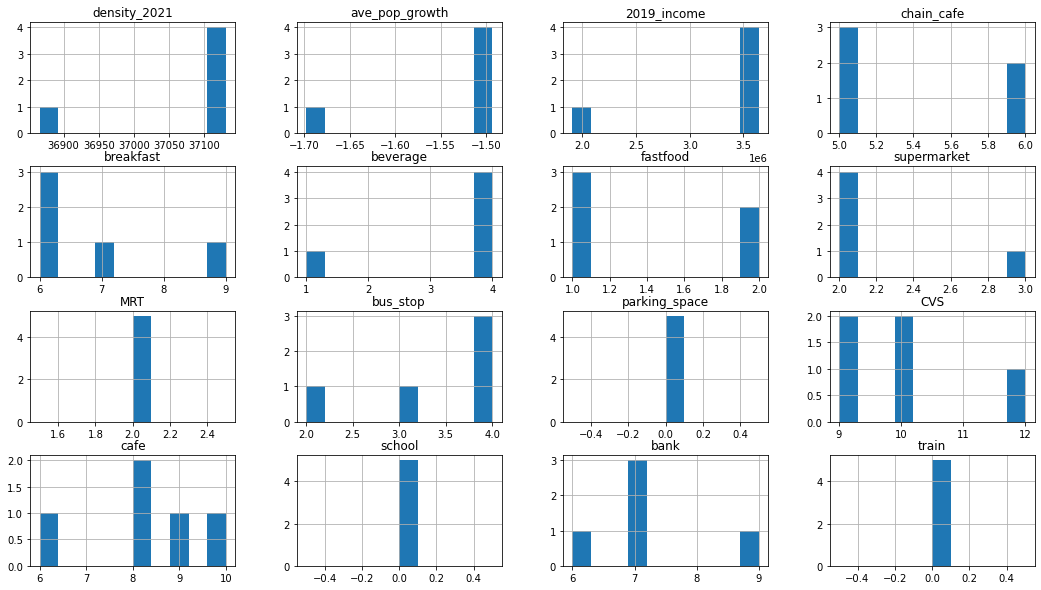

In [33]:
df_5.hist(figsize=(18, 10));

# 大部分人口密度(37131.21)
# 人口大多緩步負成長(-1.493150)
# 年收均值(3643217)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(4)
# 速食餐廳(1)
# 超市(2)
# 捷運(2)
# 停車場(0)
# CVS(1)
# cafe(8)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(4)站

In [34]:
feature_o[feature_o['labels'] == 6]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
55,cama,台北市松山區八德路四段668號,25.049865,121.576162,27650.057475,-0.357518,2393420,4,3.0,3.0,...,1.0,9.0,2.0,9.0,2.0,0.0,6.0,1.0,台北市松山,6
160,louisa,台北市南港區八德路四段786號,25.050500,121.580437,11625.129195,-1.392464,1566241,3,3.0,2.0,...,1.0,10.0,2.0,9.0,6.0,0.0,1.0,1.0,台北市南港,6
207,louisa,台北市松山區市民大道六段131號,25.049600,121.578755,27650.057475,-0.357518,2393420,5,3.0,4.0,...,1.0,13.0,2.0,14.0,6.0,0.0,5.0,1.0,台北市松山,6
209,louisa,台北市松山區市民大道六段131號1樓,25.049600,121.578755,27650.057475,-0.357518,2393420,5,3.0,4.0,...,1.0,13.0,2.0,14.0,6.0,0.0,5.0,1.0,台北市松山,6
398,stbks,台北市信義區松山路11號1樓,25.048456,121.578252,32744.437768,-1.758407,916899,4,3.0,4.0,...,1.0,9.0,4.0,14.0,4.0,0.0,5.0,1.0,台北市信義,6


In [35]:
df_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
df_6.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.00000,5.0,5.000000,5.000000,5.0,5.0,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0
mean,25463.947878,-0.844685,1.932680e+06,4.20000,3.0,3.400000,1.800000,0.0,1.0,10.80000,2.400000,12.000000,4.800000,0.0,4.400000,1.0
std,8044.495961,0.679512,6.713666e+05,0.83666,0.0,0.894427,0.447214,0.0,0.0,2.04939,0.894427,2.738613,1.788854,0.0,1.949359,0.0
min,11625.129195,-1.758407,9.168990e+05,3.00000,3.0,2.000000,1.000000,0.0,1.0,9.00000,2.000000,9.000000,2.000000,0.0,1.000000,1.0
25%,27650.057475,-1.392464,1.566241e+06,4.00000,3.0,3.000000,2.000000,0.0,1.0,9.00000,2.000000,9.000000,4.000000,0.0,5.000000,1.0
50%,27650.057475,-0.357518,2.393420e+06,4.00000,3.0,4.000000,2.000000,0.0,1.0,10.00000,2.000000,14.000000,6.000000,0.0,5.000000,1.0
75%,27650.057475,-0.357518,2.393420e+06,5.00000,3.0,4.000000,2.000000,0.0,1.0,13.00000,2.000000,14.000000,6.000000,0.0,5.000000,1.0
max,32744.437768,-0.357518,2.393420e+06,5.00000,3.0,4.000000,2.000000,0.0,1.0,13.00000,4.000000,14.000000,6.000000,0.0,6.000000,1.0


In [36]:
df_6.median()

density_2021      2.765006e+04
ave_pop_growth   -3.575181e-01
2019_income       2.393420e+06
chain_cafe        4.000000e+00
breakfast         3.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.000000e+01
parking_space     2.000000e+00
CVS               1.400000e+01
cafe              6.000000e+00
school            0.000000e+00
bank              5.000000e+00
train             1.000000e+00
dtype: float64

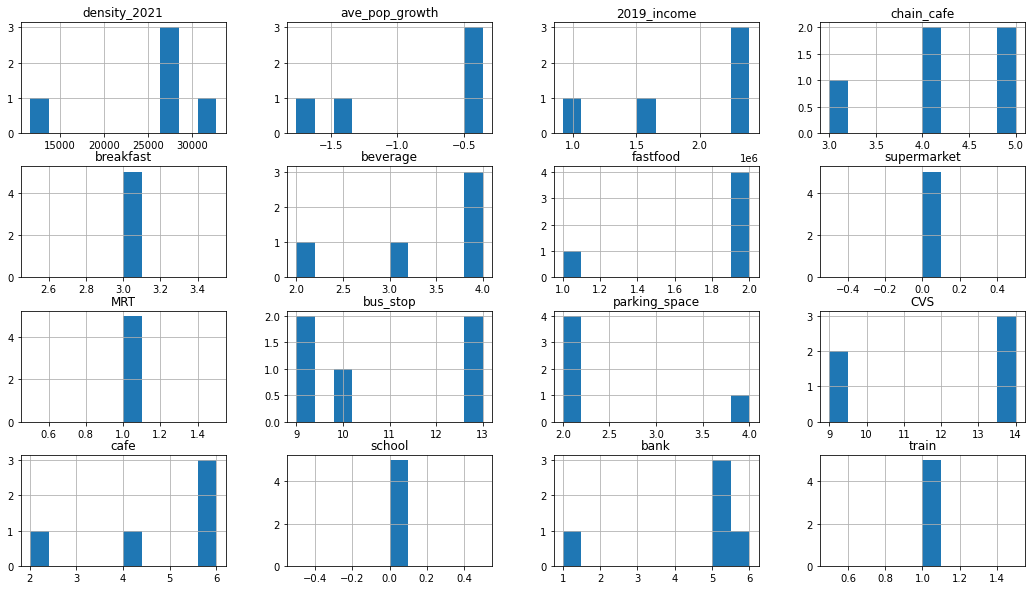

In [37]:
df_6.hist(figsize=(18, 10));

# 大部分人口密度(27650.06)
# 人口成長(-0.3575181)
# 年收均值(2393420)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(4)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(14)
# cafe(6)
# school(0)
# 銀行(5)
# 火車站(1)
# 巴士站至少(10)站

In [38]:
feature_o[feature_o['labels'] == 7]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
65,cama,新北市板橋區南雅南路二段21號Ｂ1,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,7
300,louisa,新北市板橋區南雅南路二段130號,24.996782,121.451925,15641.543072,1.141744,3539135,4,4.0,5.0,...,1.0,113.0,2.0,2.0,2.0,1.0,3.0,0.0,新北市板橋,7
525,stbks,新北市板橋區南雅南路二段21號,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,7
526,stbks,新北市板橋區南雅南路二段21號(亞東捷運站3號出口亞東醫院旁),24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,7


In [39]:
df_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
df_7.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.00,4.0,4.00,4.0,4.0,4.0
mean,15641.543072,1.141744,3539135.0,4.0,4.0,4.25,1.0,0.0,1.0,126.5,2.75,2.0,1.25,1.0,1.5,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.50,0.0,0.0,0.0,9.0,0.50,0.0,0.50,0.0,1.0,0.0
min,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,113.0,2.00,2.0,1.00,1.0,1.0,0.0
25%,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,126.5,2.75,2.0,1.00,1.0,1.0,0.0
50%,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,131.0,3.00,2.0,1.00,1.0,1.0,0.0
75%,15641.543072,1.141744,3539135.0,4.0,4.0,4.25,1.0,0.0,1.0,131.0,3.00,2.0,1.25,1.0,1.5,0.0
max,15641.543072,1.141744,3539135.0,4.0,4.0,5.00,1.0,0.0,1.0,131.0,3.00,2.0,2.00,1.0,3.0,0.0


In [40]:
df_7.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         4.000000e+00
beverage          4.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.310000e+02
parking_space     3.000000e+00
CVS               2.000000e+00
cafe              1.000000e+00
school            1.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

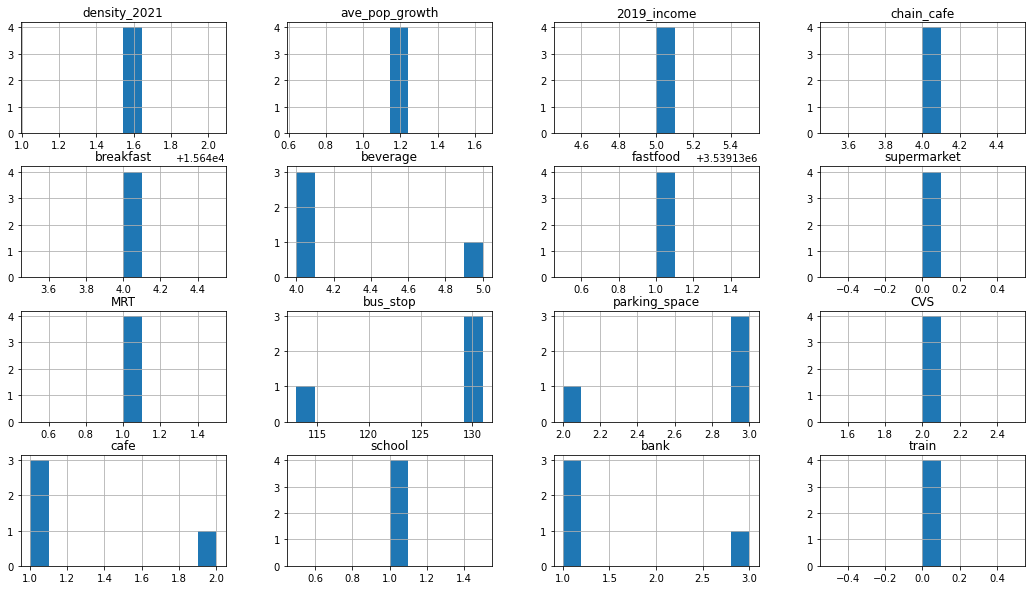

In [41]:
df_7.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 早餐店(4)
# 飲料店(4)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(2)
# cafe(1)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(131)站

In [42]:
feature_o[feature_o['labels'] == 8]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
66,cama,新北市板橋區文化路二段402號,25.031313,121.473828,48279.568265,-0.597779,869008,4,1.0,2.0,...,1.0,94.0,4.0,7.0,8.0,0.0,6.0,0.0,新北市板橋,8
297,louisa,新北市板橋區文化路二段367號,25.031026,121.473095,6286.002730,4.059030,1408720,4,1.0,2.0,...,1.0,98.0,4.0,8.0,8.0,0.0,9.0,0.0,新北市板橋,8
323,louisa,新北市永和區永和路二段92巷3號1樓,25.011540,121.515257,42575.756803,-2.069855,772578,5,0.0,1.0,...,1.0,82.0,2.0,9.0,3.0,0.0,10.0,0.0,新北市永和,8
555,stbks,新北市永和區永和路二段181號,25.013342,121.515258,46339.431174,0.525612,717508,5,0.0,2.0,...,1.0,97.0,2.0,11.0,4.0,0.0,7.0,0.0,新北市永和,8
655,85 cafe,新北市永和區永和路二段105號1F,25.011873,121.514861,46339.431174,0.525612,717508,5,0.0,2.0,...,1.0,85.0,2.0,9.0,3.0,0.0,11.0,0.0,新北市永和,8


In [43]:
df_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
df_8.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,5.0,5.000000,5.0
mean,37964.038029,0.488524,8.970644e+05,4.600000,0.400000,1.800000,1.200000,3.600000,1.0,91.200000,2.800000,8.80000,5.200000,0.0,8.600000,0.0
std,17828.842189,2.262555,2.926416e+05,0.547723,0.547723,0.447214,0.447214,0.547723,0.0,7.259477,1.095445,1.48324,2.588436,0.0,2.073644,0.0
min,6286.002730,-2.069855,7.175080e+05,4.000000,0.000000,1.000000,1.000000,3.000000,1.0,82.000000,2.000000,7.00000,3.000000,0.0,6.000000,0.0
25%,42575.756803,-0.597779,7.175080e+05,4.000000,0.000000,2.000000,1.000000,3.000000,1.0,85.000000,2.000000,8.00000,3.000000,0.0,7.000000,0.0
50%,46339.431174,0.525612,7.725780e+05,5.000000,0.000000,2.000000,1.000000,4.000000,1.0,94.000000,2.000000,9.00000,4.000000,0.0,9.000000,0.0
75%,46339.431174,0.525612,8.690080e+05,5.000000,1.000000,2.000000,1.000000,4.000000,1.0,97.000000,4.000000,9.00000,8.000000,0.0,10.000000,0.0
max,48279.568265,4.059030,1.408720e+06,5.000000,1.000000,2.000000,2.000000,4.000000,1.0,98.000000,4.000000,11.00000,8.000000,0.0,11.000000,0.0


In [44]:
df_8.median()

density_2021       46339.431174
ave_pop_growth         0.525612
2019_income       772578.000000
chain_cafe             5.000000
breakfast              0.000000
beverage               2.000000
fastfood               1.000000
supermarket            4.000000
MRT                    1.000000
bus_stop              94.000000
parking_space          2.000000
CVS                    9.000000
cafe                   4.000000
school                 0.000000
bank                   9.000000
train                  0.000000
dtype: float64

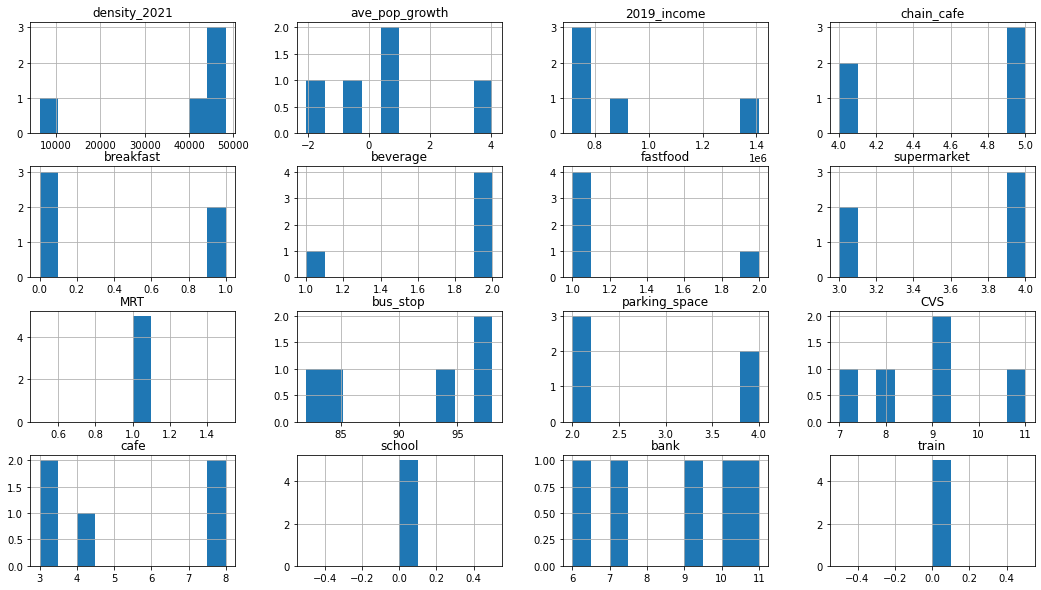

In [45]:
df_8.hist(figsize=(18, 10));

# 大部分人口密度(46339.431174)
# 人口成長(0.525612)
# 年收均值(772578)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(1)
# 超市(4)
# 捷運(1)
# 停車場(2)
# CVS(9)
# cafe(4)
# school(0)
# 銀行(9)
# 火車站(0)
# 巴士站至少(94)站

In [46]:
feature_o[feature_o['labels'] == 9]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,55.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,9
331,louisa,新北市汐止區新北市汐止區新台五路一段75號B1,25.061182,121.645750,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,48.0,1.0,4.0,1.0,0.0,4.0,1.0,新北市汐止,9
558,stbks,新北市汐止區新台五路一段94號1樓,25.060718,121.648416,9609.839147,2.511079,1450740,4,0.0,1.0,...,0.0,48.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,9
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,55.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,9


In [47]:
df_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
df_9.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.0,4.0,4.0,4.0,4.0,4.0
mean,31705.588030,0.809562,2693694.0,4.0,0.0,1.0,1.0,0.0,0.0,51.500000,1.0,5.5,1.0,0.0,4.0,1.0
std,14730.499255,1.134345,828636.0,0.0,0.0,0.0,0.0,0.0,0.0,4.041452,0.0,1.0,0.0,0.0,0.0,0.0
min,9609.839147,0.242390,1450740.0,4.0,0.0,1.0,1.0,0.0,0.0,48.000000,1.0,4.0,1.0,0.0,4.0,1.0
25%,31705.588030,0.242390,2693694.0,4.0,0.0,1.0,1.0,0.0,0.0,48.000000,1.0,5.5,1.0,0.0,4.0,1.0
50%,39070.837657,0.242390,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,51.500000,1.0,6.0,1.0,0.0,4.0,1.0
75%,39070.837657,0.809562,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,55.000000,1.0,6.0,1.0,0.0,4.0,1.0
max,39070.837657,2.511079,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,55.000000,1.0,6.0,1.0,0.0,4.0,1.0


In [48]:
df_9.median()

density_2021      3.907084e+04
ave_pop_growth    2.423895e-01
2019_income       3.108012e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          5.150000e+01
parking_space     1.000000e+00
CVS               6.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              4.000000e+00
train             1.000000e+00
dtype: float64

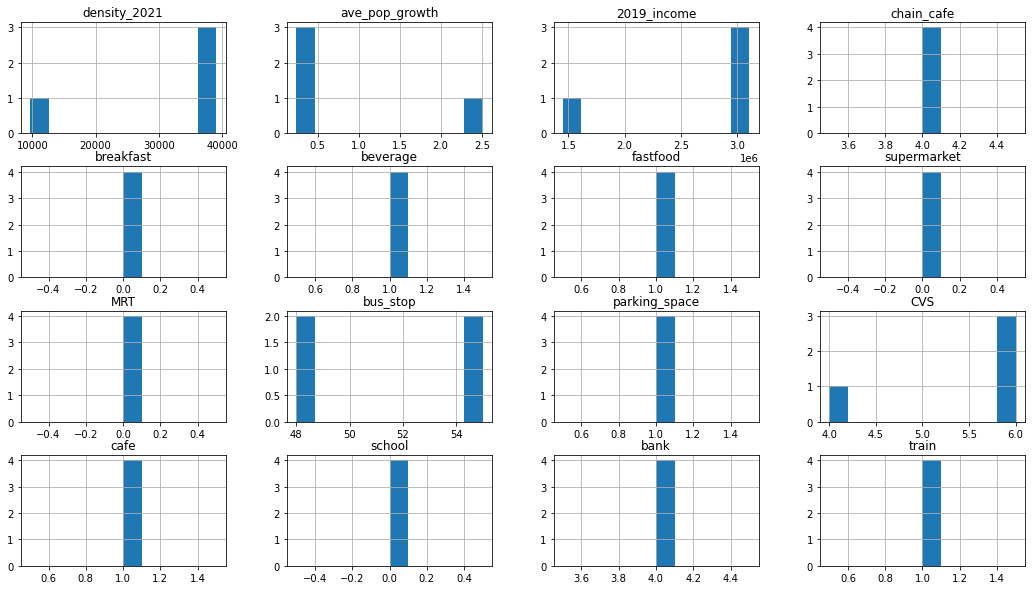

In [49]:
df_9.hist(figsize=(18, 10));

# 大部分人口密度(39070.84)
# 人口成長(0.2423895)
# 年收均值(3108012)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(6)
# cafe(1)
# school(0)
# 銀行(4)
# 火車站(1)
# 巴士站至少(51.5)站

In [50]:
feature_o[feature_o['labels'] == 10]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
90,louisa,台北市南京東路三段256巷20弄2號,25.050653,121.544800,29466.572383,-1.142284,5786935,4,0.0,1.0,...,2.0,14.0,0.0,14.0,8.0,0.0,21.0,0.0,台北市南京東路三段256巷20弄2號,10
101,louisa,台北市中山區遼寧街112號,25.052610,121.541998,21224.915953,-0.414378,2723005,5,0.0,1.0,...,2.0,28.0,4.0,13.0,16.0,0.0,22.0,0.0,台北市中山,10
210,louisa,台北市松山區慶城街14-1號,25.053151,121.545272,29466.572383,-1.142284,5786935,4,1.0,3.0,...,2.0,14.0,2.0,13.0,10.0,0.0,17.0,0.0,台北市松山,10
365,stbks,台北市中山區南京東路三段224號1F,25.051659,121.543728,21085.129310,0.000600,3990206,5,0.0,1.0,...,2.0,14.0,2.0,13.0,10.0,0.0,23.0,0.0,台北市中山,10
477,stbks,台北市松山區慶城街1號1樓,25.052761,121.544632,29466.572383,-1.142284,5786935,6,0.0,3.0,...,2.0,14.0,2.0,13.0,16.0,0.0,22.0,0.0,台北市松山,10


In [51]:
df_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
df_10.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.00000,5.000000,5.000000,5.000000,5.000000,5.0,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0
mean,26141.952483,-0.768126,4.814803e+06,4.80000,0.200000,1.800000,4.200000,0.400000,2.0,16.80000,2.000000,13.200000,12.000000,0.0,21.000000,0.0
std,4552.691547,0.532931,1.404520e+06,0.83666,0.447214,1.095445,0.447214,0.547723,0.0,6.26099,1.414214,0.447214,3.741657,0.0,2.345208,0.0
min,21085.129310,-1.142284,2.723005e+06,4.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,0.000000,13.000000,8.000000,0.0,17.000000,0.0
25%,21224.915953,-1.142284,3.990206e+06,4.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,2.000000,13.000000,10.000000,0.0,21.000000,0.0
50%,29466.572383,-1.142284,5.786935e+06,5.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,2.000000,13.000000,10.000000,0.0,22.000000,0.0
75%,29466.572383,-0.414378,5.786935e+06,5.00000,0.000000,3.000000,4.000000,1.000000,2.0,14.00000,2.000000,13.000000,16.000000,0.0,22.000000,0.0
max,29466.572383,0.000600,5.786935e+06,6.00000,1.000000,3.000000,5.000000,1.000000,2.0,28.00000,4.000000,14.000000,16.000000,0.0,23.000000,0.0


In [52]:
df_10.median()

density_2021      2.946657e+04
ave_pop_growth   -1.142284e+00
2019_income       5.786935e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          4.000000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          1.400000e+01
parking_space     2.000000e+00
CVS               1.300000e+01
cafe              1.000000e+01
school            0.000000e+00
bank              2.200000e+01
train             0.000000e+00
dtype: float64

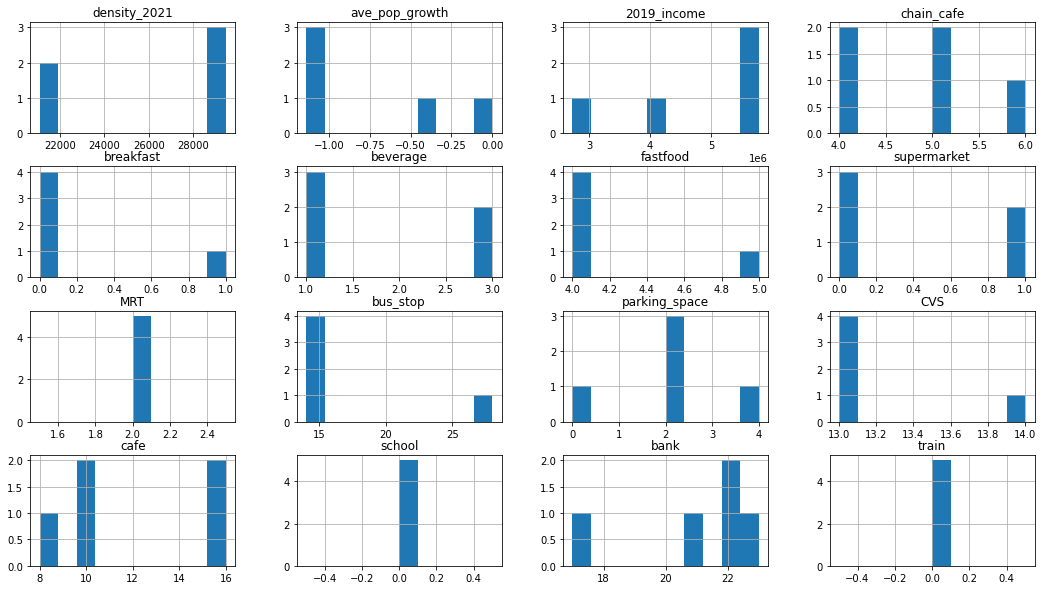

In [53]:
df_10.hist(figsize=(18, 10));

# 大部分人口密度(29466.57)
# 人口成長(-1.142284)
# 年收均值(5786935)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(4)
# 超市(0)
# 捷運(2)
# 停車場(2)
# CVS(13)
# cafe(10)
# school(0)
# 銀行(22)
# 火車站(0)
# 巴士站至少(14)站

In [54]:
feature_o[feature_o['labels'] == 11]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,10,0.0,7.0,...,2.0,57.0,1.0,30.0,5.0,0.0,14.0,1.0,台北市中正,11
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,10,1.0,7.0,...,2.0,42.0,1.0,31.0,6.0,0.0,22.0,1.0,台北市中正,11
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,11,0.0,3.0,...,2.0,49.0,2.0,24.0,5.0,0.0,3.0,1.0,台北市中正,11
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,10,1.0,7.0,...,2.0,58.0,1.0,29.0,6.0,0.0,18.0,1.0,台北市中正,11
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,11,0.0,4.0,...,2.0,50.0,2.0,25.0,4.0,0.0,3.0,1.0,台北市中正,11
384,stbks,台北市中正區忠孝西路一段47號B1,25.046880,121.516761,5734.296784,0.58577,1631191,12,0.0,5.0,...,2.0,51.0,2.0,26.0,6.0,0.0,6.0,1.0,台北市中正,11


In [55]:
df_11=feature_o[feature_o['labels'] == 11].loc[:,'density_2021':'train']
df_11.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000e+00,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.00000,6.0
mean,5734.296784,5.857702e-01,1631191.0,10.666667,0.333333,5.500000,10.833333,0.0,2.0,51.166667,1.500000,27.500000,5.333333,0.0,11.00000,1.0
std,0.000000,1.216188e-16,0.0,0.816497,0.516398,1.760682,0.752773,0.0,0.0,5.845226,0.547723,2.880972,0.816497,0.0,8.14862,0.0
min,5734.296784,5.857702e-01,1631191.0,10.000000,0.000000,3.000000,10.000000,0.0,2.0,42.000000,1.000000,24.000000,4.000000,0.0,3.00000,1.0
25%,5734.296784,5.857702e-01,1631191.0,10.000000,0.000000,4.250000,10.250000,0.0,2.0,49.250000,1.000000,25.250000,5.000000,0.0,3.75000,1.0
50%,5734.296784,5.857702e-01,1631191.0,10.500000,0.000000,6.000000,11.000000,0.0,2.0,50.500000,1.500000,27.500000,5.500000,0.0,10.00000,1.0
75%,5734.296784,5.857702e-01,1631191.0,11.000000,0.750000,7.000000,11.000000,0.0,2.0,55.500000,2.000000,29.750000,6.000000,0.0,17.00000,1.0
max,5734.296784,5.857702e-01,1631191.0,12.000000,1.000000,7.000000,12.000000,0.0,2.0,58.000000,2.000000,31.000000,6.000000,0.0,22.00000,1.0


In [56]:
df_11.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        1.050000e+01
breakfast         0.000000e+00
beverage          6.000000e+00
fastfood          1.100000e+01
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          5.050000e+01
parking_space     1.500000e+00
CVS               2.750000e+01
cafe              5.500000e+00
school            0.000000e+00
bank              1.000000e+01
train             1.000000e+00
dtype: float64

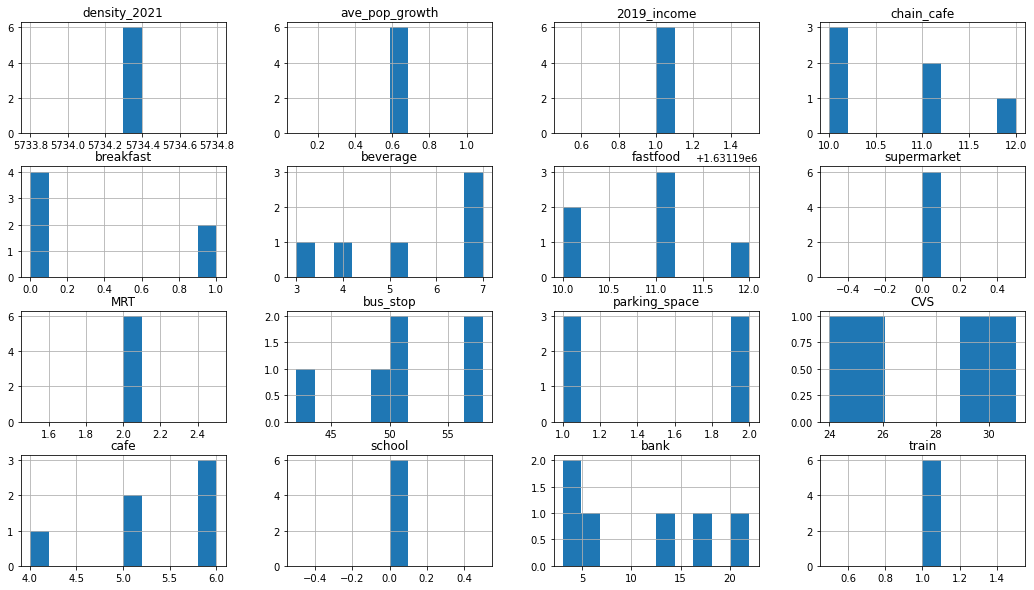

In [57]:
df_11.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口成長(0.5857702)
# 年收均值(1631191)
# 平均有(10.5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(6)
# 速食餐廳(11)
# 超市(0)
# 捷運(2)
# 停車場(1.5)
# CVS(27.5)
# cafe(5.5)
# school(0)
# 銀行(10)
# 火車站(1)
# 巴士站至少(50.5)站

In [58]:
feature_o[feature_o['labels'] == 12]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,116.0,3.0,6.0,0.0,1.0,1.0,0.0,新北市新店,12
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,4,1.0,3.0,...,1.0,103.0,5.0,5.0,0.0,1.0,1.0,0.0,新北市新店,12
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,4,1.0,3.0,...,1.0,103.0,5.0,5.0,0.0,1.0,1.0,0.0,新北市新店,12
627,85 cafe,新北市新店區北宜路1段9號,24.958817,121.538472,6005.258800,0.086185,279043,4,1.0,3.0,...,1.0,91.0,5.0,6.0,0.0,1.0,1.0,0.0,新北市新店,12


In [59]:
df_12=feature_o[feature_o['labels'] == 12].loc[:,'density_2021':'train']
df_12.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.00,4.0,4.00,4.00,4.00,4.0,4.0,4.000000,4.0,4.00000,4.0,4.0,4.0,4.0
mean,15551.797664,2.212973,672421.75,4.0,0.75,2.75,0.75,0.0,1.0,103.250000,4.5,5.50000,0.0,1.0,1.0,0.0
std,6364.359242,1.417858,262252.50,0.0,0.50,0.50,0.50,0.0,0.0,10.210289,1.0,0.57735,0.0,0.0,0.0,0.0
min,6005.258800,0.086185,279043.00,4.0,0.00,2.00,0.00,0.0,1.0,91.000000,3.0,5.00000,0.0,1.0,1.0,0.0
25%,15551.797664,2.212973,672421.75,4.0,0.75,2.75,0.75,0.0,1.0,100.000000,4.5,5.00000,0.0,1.0,1.0,0.0
50%,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,103.000000,5.0,5.50000,0.0,1.0,1.0,0.0
75%,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,106.250000,5.0,6.00000,0.0,1.0,1.0,0.0
max,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,116.000000,5.0,6.00000,0.0,1.0,1.0,0.0


In [60]:
df_12.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             4.000000
breakfast              1.000000
beverage               3.000000
fastfood               1.000000
supermarket            0.000000
MRT                    1.000000
bus_stop             103.000000
parking_space          5.000000
CVS                    5.500000
cafe                   0.000000
school                 1.000000
bank                   1.000000
train                  0.000000
dtype: float64

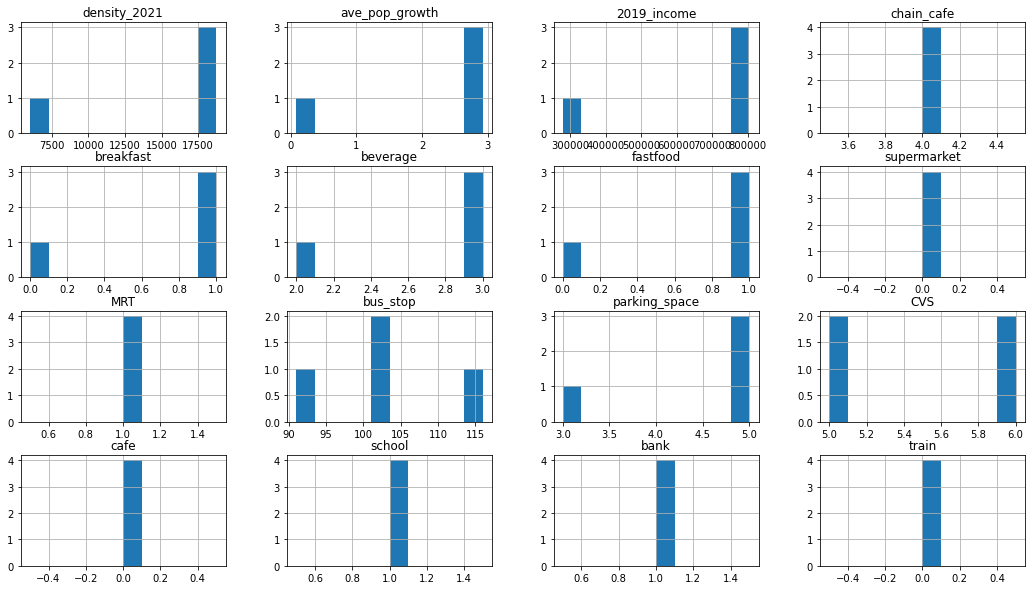

In [61]:
df_12.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口成長(2.921902)
# 年收均值(803548)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(3)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(5)
# CVS(5.5)
# cafe(0)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(103)站

In [62]:
feature_o[feature_o['labels'] == 13]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,13
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,13
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,13
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,13
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,13


In [63]:
df_13=feature_o[feature_o['labels'] == 13].loc[:,'density_2021':'train']
df_13.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0


In [64]:
df_13.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          2.160000e+02
parking_space     7.000000e+00
CVS               1.200000e+01
cafe              3.000000e+00
school            0.000000e+00
bank              8.000000e+00
train             1.000000e+00
dtype: float64

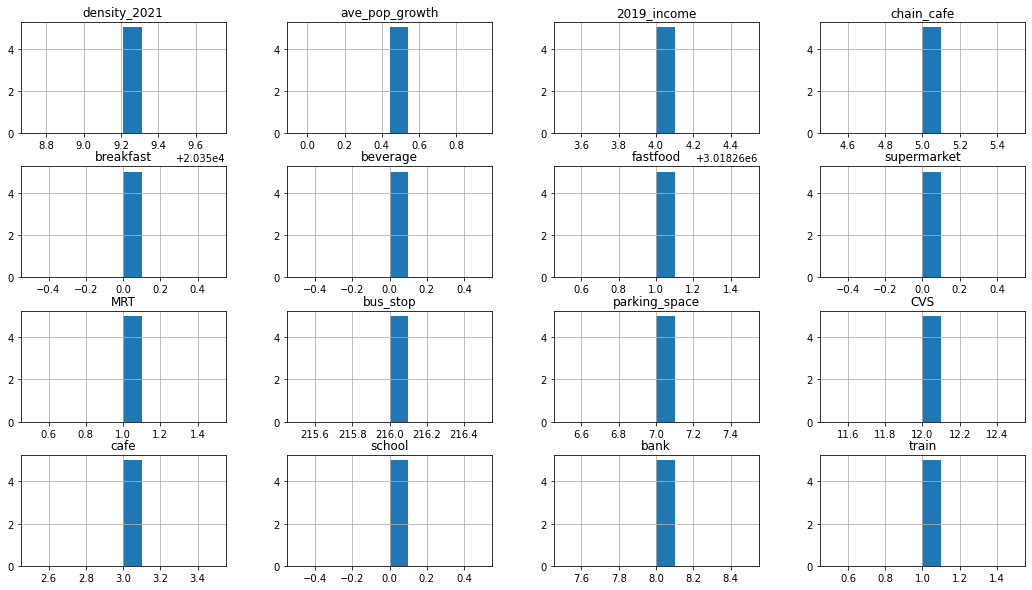

In [65]:
df_13.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口成長(0.4416789)
# 年收均值(3018264)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(7)
# CVS(12)
# cafe(3)
# school(0)
# 銀行(8)
# 火車站(1)
# 巴士站至少(216)站

In [66]:
feature_o[feature_o['labels'] == 14]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,160.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,台北市士林,14
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14


In [67]:
df_14=feature_o[feature_o['labels'] == 14].loc[:,'density_2021':'train']
df_14.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.0
mean,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.25,4.0,5.0,0.0,0.0,3.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0
min,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
25%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
50%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
75%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.25,4.0,5.0,0.0,0.0,3.0,0.0
max,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,160.00,4.0,5.0,0.0,0.0,3.0,0.0


In [68]:
df_14.median()

density_2021      1.195340e+04
ave_pop_growth    8.386823e-01
2019_income       5.934044e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          1.590000e+02
parking_space     4.000000e+00
CVS               5.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

In [69]:
feature_o[feature_o['labels'] == 14]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,160.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,台北市士林,14
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,14


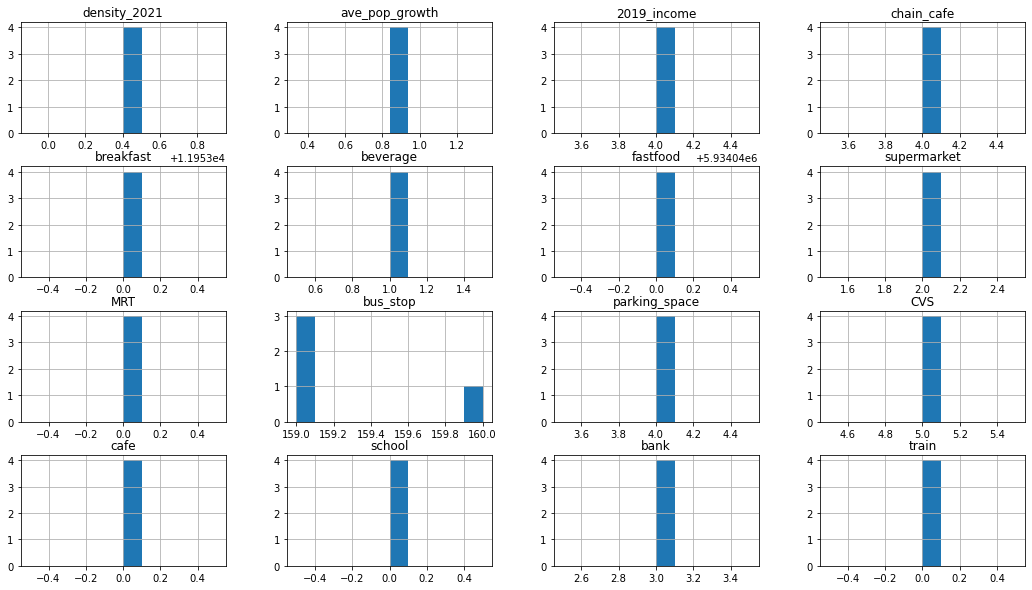

In [70]:
df_14.hist(figsize=(18, 10));

# 大部分人口密度(11953.40)
# 人口成長(0.8386823)
# 年收均值(5934044)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(2)
# 捷運(0)
# 停車場(4)
# CVS(5)
# cafe(0)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(159)站

In [71]:
df_15=feature_o[feature_o['labels'] == 15].loc[:,'density_2021':'train']
df_15.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.000000,4.00,4.000000,4.00000,4.00,4.0,4.000000,4.0,4.000000,4.000000,4.0,4.000000,4.0
mean,43658.613473,-1.080165,2.430474e+06,4.000000,7.25,1.000000,1.50000,0.25,0.0,1.250000,1.0,9.000000,13.000000,0.0,8.250000,0.0
std,17239.519830,0.963706,1.099006e+06,0.816497,0.50,1.414214,0.57735,0.50,0.0,0.957427,0.0,1.825742,4.082483,0.0,5.315073,0.0
min,18172.885686,-2.524799,1.403888e+06,3.000000,7.00,0.000000,1.00000,0.00,0.0,0.000000,1.0,7.000000,7.000000,0.0,2.000000,0.0
25%,42110.226080,-1.116714,1.974444e+06,3.750000,7.00,0.000000,1.00000,0.00,0.0,0.750000,1.0,7.750000,12.250000,0.0,6.500000,0.0
50%,50089.339545,-0.610803,2.164630e+06,4.000000,7.00,0.500000,1.50000,0.00,0.0,1.500000,1.0,9.000000,14.500000,0.0,8.000000,0.0
75%,51637.726937,-0.574254,2.620660e+06,4.250000,7.25,1.500000,2.00000,0.25,0.0,2.000000,1.0,10.250000,15.250000,0.0,9.750000,0.0
max,56282.889115,-0.574254,3.988748e+06,5.000000,8.00,3.000000,2.00000,1.00,0.0,2.000000,1.0,11.000000,16.000000,0.0,15.000000,0.0


In [72]:
df_15.median()

density_2021      5.008934e+04
ave_pop_growth   -6.108032e-01
2019_income       2.164630e+06
chain_cafe        4.000000e+00
breakfast         7.000000e+00
beverage          5.000000e-01
fastfood          1.500000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.500000e+00
parking_space     1.000000e+00
CVS               9.000000e+00
cafe              1.450000e+01
school            0.000000e+00
bank              8.000000e+00
train             0.000000e+00
dtype: float64

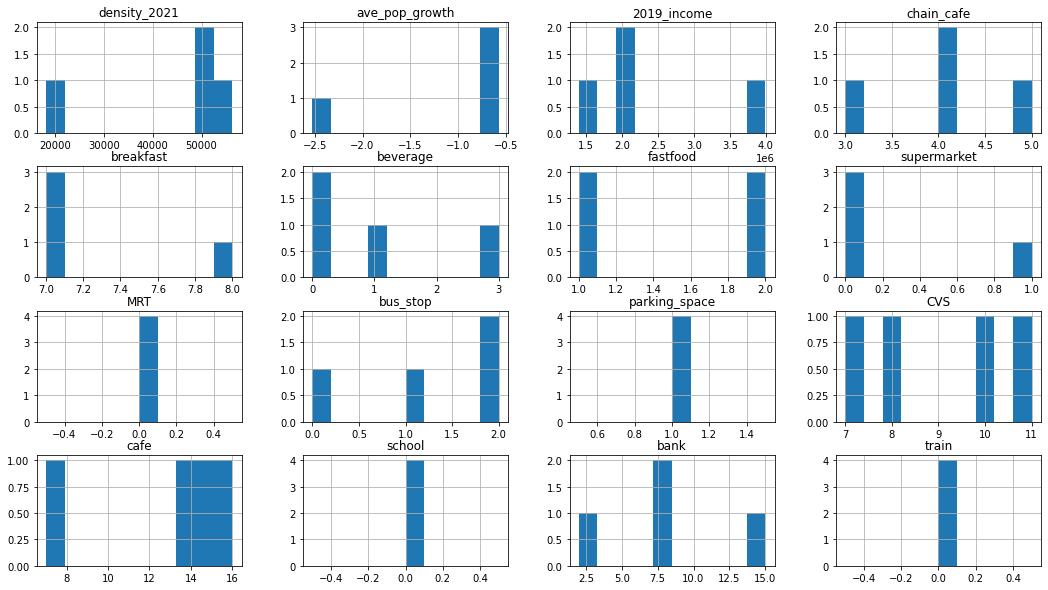

In [73]:
df_15.hist(figsize=(18, 10));

# 大部分人口密度(50089.34)
# 人口成長(-0.6108032)
# 年收均值(2164630)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(7)
# 飲料店(0.5)
# 速食餐廳(1.5)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(9)
# cafe(14.5)
# school(0)
# 銀行(8)
# 火車站(0)
# 巴士站至少(1.5)站

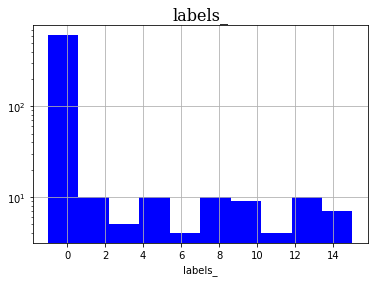

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [168]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pickle
from joblib import dump, load

scaler = StandardScaler()
X = np.array(scaler.fit_transform(feature))
clustering = DBSCAN(eps=6, metric='l1',algorithm='kd_tree' ,min_samples=4).fit(X)

# 存模型
clf = pickle.dumps(clustering)

dump(clf, 'nearby300m.joblib') 

n, bins, patches = plt.hist(clustering.labels_, facecolor='b',log=True)

plt.xlabel('labels_')

font = {'family': 'serif',
    'weight': 'normal',
    'size': 16,
    }

plt.title('labels_',fontdict=font)
plt.grid(True)
plt.show()
feature_o['labels'] = list(clustering.labels_)
set(clustering.labels_)

In [98]:
feature_o[feature_o['labels'] == -1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
6,cama,台北市中山區民生東路一段2號,25.057835,121.523249,40836.413198,-0.122100,2793229,3,3.0,2.0,...,1.0,29.0,1.0,20.0,9.0,0.0,17.0,0.0,台北市中山,-1
9,cama,台北市中山區中山北路三段25之10號,25.065187,121.522484,49924.217762,-0.584791,2439490,4,0.0,4.0,...,0.0,28.0,0.0,10.0,6.0,2.0,7.0,0.0,台北市中山,-1
10,cama,台北市中山區長春路366號,25.054472,121.542608,70650.640354,-1.100691,2228394,3,6.0,1.0,...,2.0,20.0,4.0,10.0,12.0,0.0,16.0,0.0,台北市中山,-1
13,cama,台北市中正區延平南路15號,25.045888,121.510784,12649.652578,-0.527811,1658650,2,2.0,1.0,...,0.0,97.0,0.0,13.0,10.0,0.0,25.0,0.0,台北市中正,-1
15,cama,台北市中正區襄陽路35號,25.043533,121.513723,5734.296784,0.585770,1631191,5,1.0,6.0,...,0.0,97.0,0.0,17.0,11.0,1.0,43.0,0.0,台北市中正,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,85 cafe,新北市永和區永和路二段105號1F,25.011873,121.514861,46339.431174,0.525612,717508,5,0.0,2.0,...,1.0,85.0,2.0,9.0,3.0,0.0,11.0,0.0,新北市永和,-1
658,85 cafe,新北市汐止區樟樹一路121號,25.064361,121.641977,19265.874578,0.365886,2458129,1,0.0,2.0,...,0.0,32.0,1.0,5.0,0.0,1.0,0.0,0.0,新北市汐止,-1
659,85 cafe,新北市汐止區建成路37巷1號,25.072748,121.663666,37822.255842,0.472579,1531175,2,5.0,0.0,...,0.0,58.0,4.0,8.0,1.0,0.0,0.0,0.0,新北市汐止,-1
663,85 cafe,新北市淡水區中山北路一段149巷15號,25.177600,121.442849,31200.839681,-1.180762,883952,1,1.0,2.0,...,0.0,286.0,2.0,3.0,3.0,0.0,2.0,0.0,新北市淡水,-1


In [99]:
dfz_i1=feature_o[feature_o['labels'] == -1].loc[:,'density_2021':'train']
dfz_i1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,168.000000,168.000000,1.680000e+02,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000,168.000000,168.000000
mean,31412.938367,-0.155115,2.521016e+06,2.970238,2.285714,3.065476,1.726190,1.339286,0.500000,72.654762,1.684524,8.541667,7.10119,0.351190,8.404762,0.083333
std,19871.767452,2.706681,1.793155e+06,1.731794,2.189093,2.503028,1.647725,1.523588,0.656611,78.002532,1.899070,4.833583,7.35062,0.503162,8.784334,0.277212
min,1318.101678,-12.785775,8.480800e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,15842.918279,-1.412715,1.334718e+06,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,5.000000,2.00000,0.000000,3.000000,0.000000
50%,30122.071166,-0.574254,1.989320e+06,3.000000,1.000000,3.000000,2.000000,1.000000,0.000000,52.000000,1.000000,7.000000,4.00000,0.000000,6.000000,0.000000
75%,45634.226731,0.497825,3.394181e+06,4.000000,4.000000,4.250000,2.000000,2.000000,1.000000,107.000000,2.000000,10.250000,11.00000,1.000000,10.250000,0.000000
max,110994.346742,12.415476,1.057882e+07,9.000000,9.000000,10.000000,9.000000,7.000000,2.000000,423.000000,10.000000,26.000000,40.00000,2.000000,48.000000,1.000000


In [100]:
dfz_i1.median()

density_2021      3.012207e+04
ave_pop_growth   -5.742544e-01
2019_income       1.989320e+06
chain_cafe        3.000000e+00
breakfast         1.000000e+00
beverage          3.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          5.200000e+01
parking_space     1.000000e+00
CVS               7.000000e+00
cafe              4.000000e+00
school            0.000000e+00
bank              6.000000e+00
train             0.000000e+00
dtype: float64

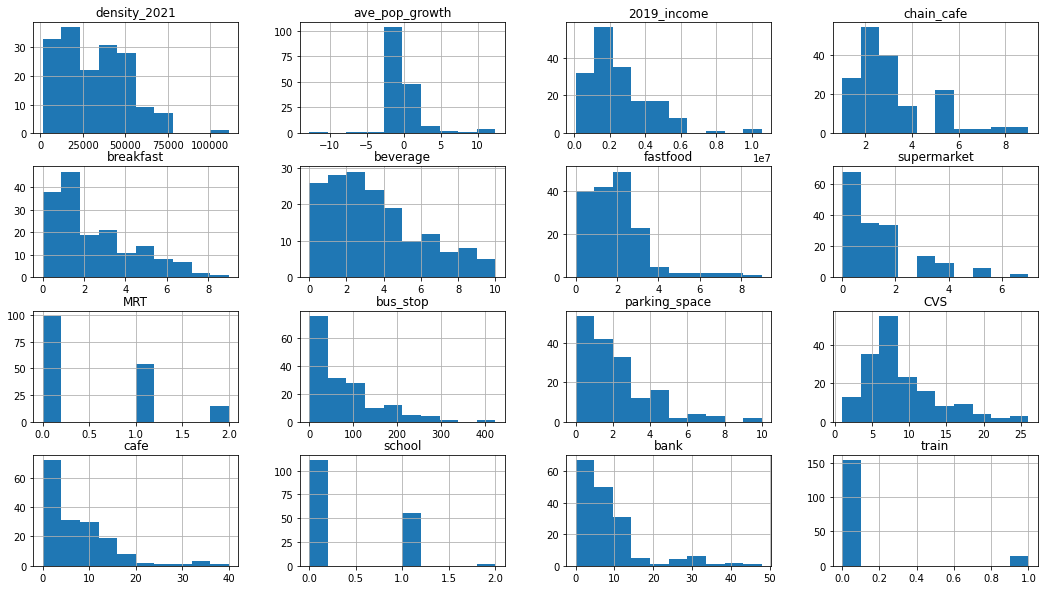

In [101]:
dfz_i1.hist(figsize=(18, 10));

# 大部分人口密度(30122.07)
# 人口大多緩步負成長(-0.5742544)
# 年收均值(1989320)
# 平均有(3)間小型咖啡廳
# 早餐店(1)
# 飲料店(3)
# 速食餐廳(2)
# 超市(1)
# 捷運(0)
# 停車場(1)
# CVS(7)
# cafe(4)
# school(0)
# 銀行(6)
# 火車站(0)
# 巴士站至少(52)站

In [102]:
feature_o[feature_o['labels'] == 0]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
0,cama,台北市敦化南路二段5號,25.032824,121.549153,30537.582094,-1.038945,3844691,3,1.0,0.0,...,0.0,55.0,1.0,5.0,9.0,1.0,19.0,0.0,台北市敦化南路二段5號,0
1,cama,台北市中山區民生東路二段133號,25.058088,121.532388,34199.348503,-1.879027,1857272,5,0.0,2.0,...,1.0,70.0,1.0,6.0,14.0,0.0,12.0,0.0,台北市中山,0
2,cama,台北市中山區長安東路二段94號,25.048324,121.534597,16690.778379,-0.500099,2769267,3,1.0,2.0,...,0.0,0.0,1.0,7.0,7.0,1.0,13.0,0.0,台北市中山,0
3,cama,台北市中山區長春路133-5號,25.054950,121.531175,30029.689819,-0.402234,2750941,2,2.0,2.0,...,0.0,0.0,1.0,8.0,6.0,0.0,24.0,0.0,台北市中山,0
4,cama,台北市中山區民權東路二段97號,25.062712,121.532380,37267.488548,-1.043902,1839588,3,1.0,0.0,...,0.0,39.0,0.0,10.0,9.0,0.0,5.0,0.0,台北市中山,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,85 cafe,新北市蘆洲區光華路174號,25.082182,121.465159,33846.823431,-0.448332,904809,1,1.0,6.0,...,0.0,105.0,0.0,7.0,0.0,0.0,1.0,0.0,新北市蘆洲,0
669,85 cafe,新北市蘆洲區民族路321號,25.091487,121.474329,15354.918545,-0.271195,2131815,1,1.0,2.0,...,0.0,34.0,0.0,7.0,1.0,0.0,0.0,0.0,新北市蘆洲,0
670,85 cafe,新北市金山區中山路106號,25.219346,121.639930,4921.167930,-2.656622,77812,2,3.0,2.0,...,0.0,59.0,2.0,3.0,1.0,0.0,0.0,0.0,新北市金山,0
671,85 cafe,新北市鶯歌區鶯桃路656號,24.969223,121.329193,6298.055230,7.973902,991876,1,0.0,1.0,...,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,新北市鶯歌,0


In [103]:
dfz_0=feature_o[feature_o['labels'] == 0].loc[:,'density_2021':'train']
dfz_0.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0
mean,30017.920447,-0.589654,2.234839e+06,2.259174,1.518349,1.818807,0.912844,1.077982,0.268349,44.096330,1.020642,6.243119,3.791284,0.116972,5.431193,0.0
std,19662.747651,1.540595,1.320659e+06,1.193578,1.672532,1.759497,0.913108,1.119676,0.506517,46.685644,1.370304,2.847959,4.053665,0.342521,5.540019,0.0
min,620.705292,-4.033235,7.781200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12999.759924,-1.334939,1.229228e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.0
50%,29921.553751,-0.855241,1.951855e+06,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,32.000000,1.000000,6.000000,2.000000,0.000000,4.000000,0.0
75%,41829.312145,-0.253030,2.776758e+06,3.000000,2.000000,3.000000,2.000000,2.000000,0.000000,65.000000,2.000000,8.000000,6.000000,0.000000,9.000000,0.0
max,95907.282896,9.949524,8.391668e+06,8.000000,8.000000,8.000000,4.000000,5.000000,2.000000,268.000000,6.000000,16.000000,21.000000,2.000000,37.000000,0.0


In [104]:
dfz_0.median()

density_2021      2.992155e+04
ave_pop_growth   -8.552414e-01
2019_income       1.951855e+06
chain_cafe        2.000000e+00
breakfast         1.000000e+00
beverage          2.000000e+00
fastfood          1.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          3.200000e+01
parking_space     1.000000e+00
CVS               6.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              4.000000e+00
train             0.000000e+00
dtype: float64

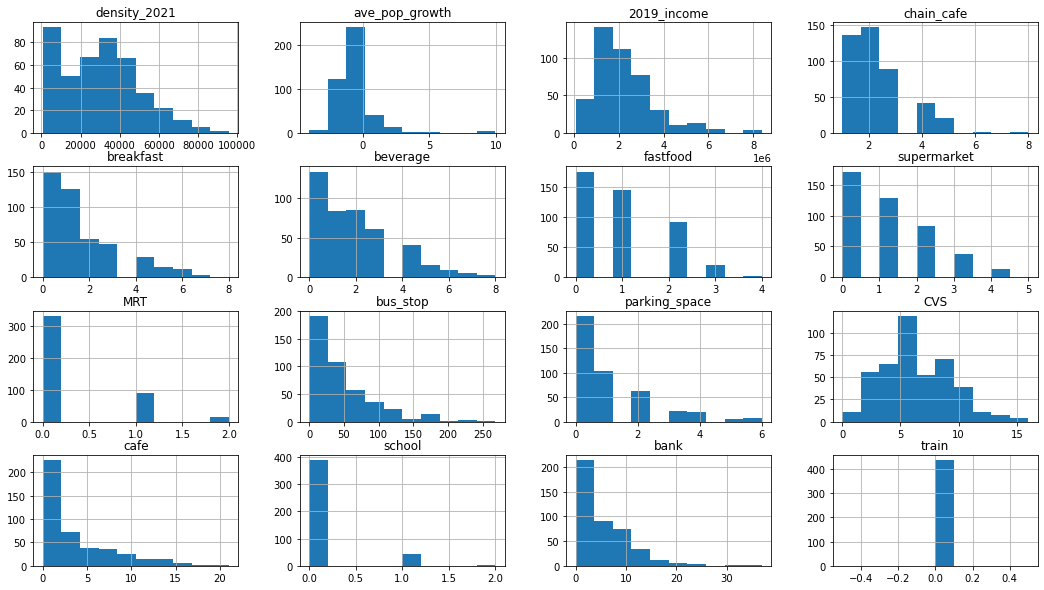

In [105]:
dfz_0.hist(figsize=(18, 10));

# 大部分人口密度(29921.55)
# 人口大多緩步負成長(-0.8552414)
# 年收均值(1951855)
# 平均有(2)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(2)
# 速食餐廳(1)
# 超市(1)
# 捷運(0)
# 停車場(1)
# CVS(6)
# cafe(2)
# school(0)
# 銀行(4)
# 火車站(0)
# 巴士站至少(32)站

In [106]:
dfz_1=feature_o[feature_o['labels'] == 1].loc[:,'density_2021':'train']
dfz_1.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.0
mean,26068.185734,-3.219035,2.742631e+06,3.500000,2.000000,4.666667,1.666667,1.0,2.0,14.333333,1.500000,6.000000,9.666667,0.0,13.000000,0.0
std,59.215464,0.920311,1.004468e+05,0.547723,1.095445,0.816497,0.516398,0.0,0.0,12.242004,1.643168,2.607681,1.632993,0.0,0.894427,0.0
min,26014.129659,-4.059160,2.650936e+06,3.000000,1.000000,3.000000,1.000000,1.0,2.0,2.000000,0.000000,3.000000,8.000000,0.0,12.000000,0.0
25%,26014.129659,-4.059160,2.650936e+06,3.000000,1.000000,5.000000,1.250000,1.0,2.0,4.000000,0.000000,4.250000,8.250000,0.0,12.250000,0.0
50%,26068.185734,-3.219035,2.742631e+06,3.500000,2.000000,5.000000,2.000000,1.0,2.0,13.500000,1.500000,5.500000,9.500000,0.0,13.000000,0.0
75%,26122.241810,-2.378910,2.834326e+06,4.000000,3.000000,5.000000,2.000000,1.0,2.0,23.750000,3.000000,7.500000,10.750000,0.0,13.750000,0.0
max,26122.241810,-2.378910,2.834326e+06,4.000000,3.000000,5.000000,2.000000,1.0,2.0,29.000000,3.000000,10.000000,12.000000,0.0,14.000000,0.0


In [107]:
feature_o[feature_o['labels'] == 1]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
11,cama,台北市中正區新生南路一段90號,25.040386,121.532560,26122.241810,-2.37891,2834326,3,1.0,3.0,...,2.0,4.0,3.0,6.0,8.0,0.0,14.0,0.0,台北市中正,1
16,cama,台北市中正區南昌路一段39號,25.031563,121.517084,26014.129659,-4.05916,2650936,4,3.0,5.0,...,2.0,29.0,0.0,5.0,11.0,0.0,14.0,0.0,台北市中正,1
85,louisa,台北市臨沂街27巷9-4號,25.041235,121.531428,26122.241810,-2.37891,2834326,4,1.0,5.0,...,2.0,4.0,3.0,8.0,9.0,0.0,13.0,0.0,台北市臨沂街27巷9-4號,1
120,louisa,台北市中正區南海路24號,25.032416,121.516716,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,24.0,0.0,4.0,8.0,0.0,12.0,0.0,台北市中正,1
369,stbks,台北市中正區忠孝東路二段134巷2號,25.041964,121.531706,26122.241810,-2.37891,2834326,4,1.0,5.0,...,2.0,2.0,3.0,10.0,12.0,0.0,13.0,0.0,台北市中正,1
381,stbks,台北市中正區南海路20號,25.032492,121.517011,26014.129659,-4.05916,2650936,3,3.0,5.0,...,2.0,23.0,0.0,3.0,10.0,0.0,12.0,0.0,台北市中正,1


In [108]:
dfz_1.median()

density_2021      2.606819e+04
ave_pop_growth   -3.219035e+00
2019_income       2.742631e+06
chain_cafe        3.500000e+00
breakfast         2.000000e+00
beverage          5.000000e+00
fastfood          2.000000e+00
supermarket       1.000000e+00
MRT               2.000000e+00
bus_stop          1.350000e+01
parking_space     1.500000e+00
CVS               5.500000e+00
cafe              9.500000e+00
school            0.000000e+00
bank              1.300000e+01
train             0.000000e+00
dtype: float64

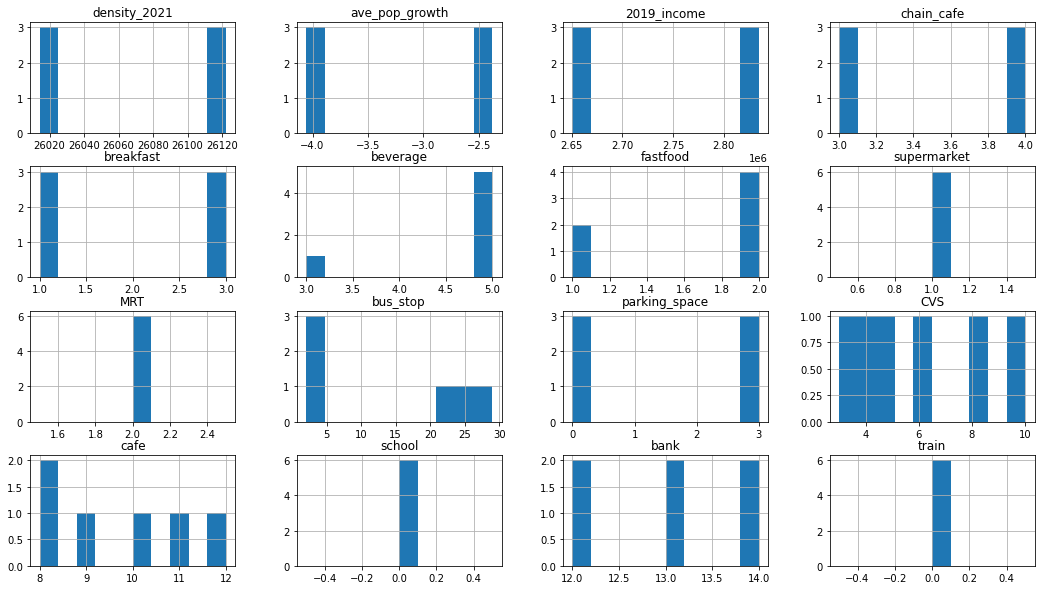

In [109]:
dfz_1.hist(figsize=(18, 10));

# 大部分人口密度(26068.19)
# 人口大多緩步負成長(-0.3219035)
# 年收均值(2742631)
# 平均有(3.5)間小型咖啡廳
# 沒有早餐店(2)
# 飲料店(5)
# 速食餐廳(2)
# 超市(1)
# 捷運(2)
# 停車場(1.5)
# CVS(5.5)
# cafe(9.5)
# school(0)
# 銀行(13)
# 火車站(0)
# 巴士站至少(13.5)站

In [110]:
feature_o[feature_o['labels'] == 2]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
21,cama,台北市信義區基隆路一段167號,25.041675,121.565175,22399.060766,-2.131716,2435957,5,5.0,1.0,...,1.0,10.0,1.0,15.0,16.0,1.0,24.0,0.0,台北市信義,2
129,louisa,台北市信義區忠孝東路五段33號,25.041308,121.565943,22399.060766,-2.131716,2435957,7,2.0,1.0,...,1.0,16.0,2.0,15.0,13.0,1.0,31.0,0.0,台北市信義,2
391,stbks,台北市信義區忠孝東路五段8號2F,25.040865,121.565417,22399.060766,-2.131716,2435957,6,5.0,1.0,...,1.0,20.0,2.0,16.0,11.0,1.0,31.0,0.0,台北市信義,2
397,stbks,台北市信義區忠孝東路5段8號B2,25.040865,121.565417,22399.060766,-2.131716,2435957,6,5.0,1.0,...,1.0,20.0,2.0,16.0,11.0,1.0,31.0,0.0,台北市信義,2


In [111]:
dfz_2=feature_o[feature_o['labels'] == 2].loc[:,'density_2021':'train']
dfz_2.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.000000,4.00,4.0,4.0,4.00000,4.0,4.000000,4.00,4.00000,4.000000,4.0,4.00,4.0
mean,22399.060766,-2.131716,2435957.0,6.000000,4.25,1.0,1.0,0.50000,1.0,16.500000,1.75,15.50000,12.750000,1.0,29.25,0.0
std,0.000000,0.000000,0.0,0.816497,1.50,0.0,0.0,0.57735,0.0,4.725816,0.50,0.57735,2.362908,0.0,3.50,0.0
min,22399.060766,-2.131716,2435957.0,5.000000,2.00,1.0,1.0,0.00000,1.0,10.000000,1.00,15.00000,11.000000,1.0,24.00,0.0
25%,22399.060766,-2.131716,2435957.0,5.750000,4.25,1.0,1.0,0.00000,1.0,14.500000,1.75,15.00000,11.000000,1.0,29.25,0.0
50%,22399.060766,-2.131716,2435957.0,6.000000,5.00,1.0,1.0,0.50000,1.0,18.000000,2.00,15.50000,12.000000,1.0,31.00,0.0
75%,22399.060766,-2.131716,2435957.0,6.250000,5.00,1.0,1.0,1.00000,1.0,20.000000,2.00,16.00000,13.750000,1.0,31.00,0.0
max,22399.060766,-2.131716,2435957.0,7.000000,5.00,1.0,1.0,1.00000,1.0,20.000000,2.00,16.00000,16.000000,1.0,31.00,0.0


In [113]:
dfz_2.median()

density_2021      2.239906e+04
ave_pop_growth   -2.131716e+00
2019_income       2.435957e+06
chain_cafe        6.000000e+00
breakfast         5.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       5.000000e-01
MRT               1.000000e+00
bus_stop          1.800000e+01
parking_space     2.000000e+00
CVS               1.550000e+01
cafe              1.200000e+01
school            1.000000e+00
bank              3.100000e+01
train             0.000000e+00
dtype: float64

In [114]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,27.0,0.0,6.0,1.0,0.0,2.0,1.0,台北市南港,3


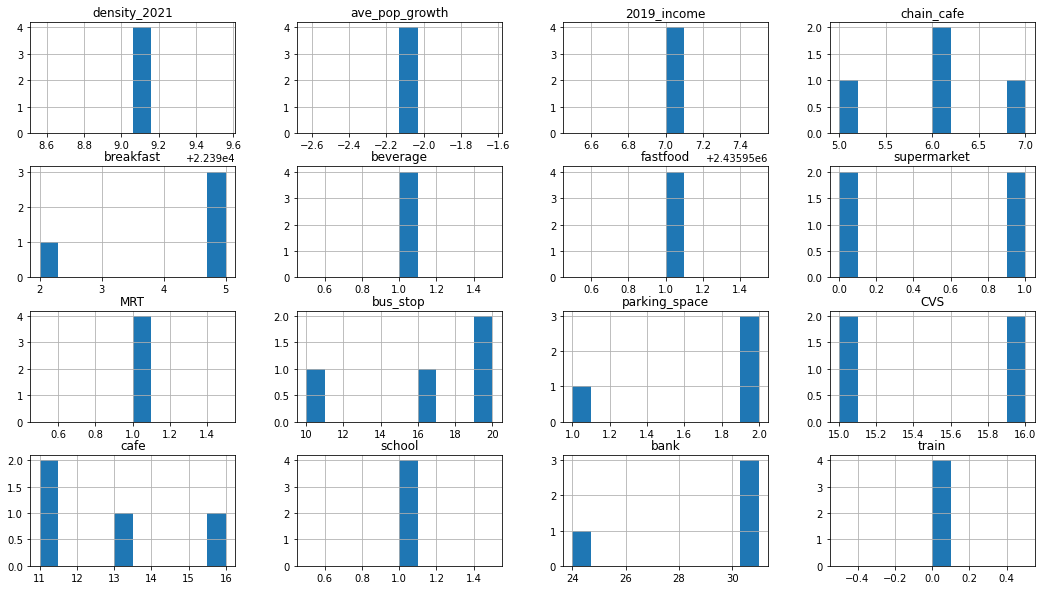

In [112]:
dfz_2.hist(figsize=(18, 10));

# 大部分人口密度(22399.06)
# 人口大多緩步負成長(-2.131716)
# 年收均值(2435957)
# 平均有(6)間小型咖啡廳
# 早餐店(5)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0.5)
# 捷運(1)
# 停車場(2)
# CVS(15.5)
# cafe(12)
# school(1)
# 銀行(31)
# 火車站(0)
# 巴士站至少(18)站

In [115]:
dfz_3=feature_o[feature_o['labels'] == 3].loc[:,'density_2021':'train']
dfz_3.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.000000,5.0,5.0,5.000000,5.0,5.00000,5.000000,5.0,5.0,5.0
mean,2156.336462,-2.364998,992878.0,6.600000,0.0,2.0,1.600000,0.0,1.0,23.800000,0.0,4.80000,1.800000,0.0,2.0,1.0
std,0.000000,0.000000,0.0,0.547723,0.0,0.0,0.547723,0.0,0.0,1.788854,0.0,0.83666,0.447214,0.0,0.0,0.0
min,2156.336462,-2.364998,992878.0,6.000000,0.0,2.0,1.000000,0.0,1.0,23.000000,0.0,4.00000,1.000000,0.0,2.0,1.0
25%,2156.336462,-2.364998,992878.0,6.000000,0.0,2.0,1.000000,0.0,1.0,23.000000,0.0,4.00000,2.000000,0.0,2.0,1.0
50%,2156.336462,-2.364998,992878.0,7.000000,0.0,2.0,2.000000,0.0,1.0,23.000000,0.0,5.00000,2.000000,0.0,2.0,1.0
75%,2156.336462,-2.364998,992878.0,7.000000,0.0,2.0,2.000000,0.0,1.0,23.000000,0.0,5.00000,2.000000,0.0,2.0,1.0
max,2156.336462,-2.364998,992878.0,7.000000,0.0,2.0,2.000000,0.0,1.0,27.000000,0.0,6.00000,2.000000,0.0,2.0,1.0


In [116]:
feature_o[feature_o['labels'] == 3]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
35,cama,台北市南港區忠孝東路七段371號B1,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
162,louisa,台北市南港區忠孝東路七段369號1F,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
163,louisa,台北市南港區忠孝東路7段369號2樓,25.052669,121.607208,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,23.0,0.0,5.0,2.0,0.0,2.0,1.0,台北市南港,3
421,stbks,台北市南港區忠孝東路七段371號B2,25.052571,121.607496,2156.336462,-2.364998,992878,6,0.0,2.0,...,1.0,23.0,0.0,4.0,2.0,0.0,2.0,1.0,台北市南港,3
422,stbks,台北市南港區忠孝東路7段359號A棟1樓,25.052512,121.606056,2156.336462,-2.364998,992878,7,0.0,2.0,...,1.0,27.0,0.0,6.0,1.0,0.0,2.0,1.0,台北市南港,3


In [117]:
dfz_3.median()

density_2021        2156.336462
ave_pop_growth        -2.364998
2019_income       992878.000000
chain_cafe             7.000000
breakfast              0.000000
beverage               2.000000
fastfood               2.000000
supermarket            0.000000
MRT                    1.000000
bus_stop              23.000000
parking_space          0.000000
CVS                    5.000000
cafe                   2.000000
school                 0.000000
bank                   2.000000
train                  1.000000
dtype: float64

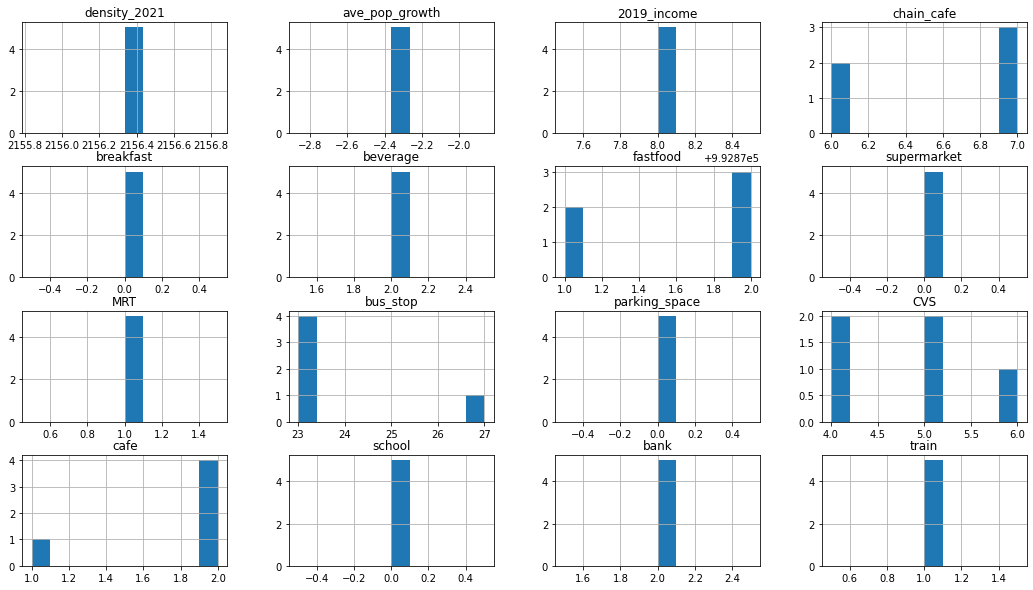

In [118]:
dfz_3.hist(figsize=(18, 10));

# 大部分人口密度(2156.336462)
# 人口大多緩步負成長(-2.364998)
# 年收均值(992878)
# 平均有(7)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(2)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(0)
# CVS(5)
# cafe(2)
# school(0)
# 銀行(2)
# 火車站(1)
# 巴士站至少(23)站

In [119]:
dfz_4=feature_o[feature_o['labels'] == 4].loc[:,'density_2021':'train']
dfz_4.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.000000,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.000000,5.00000,5.0,5.000000,5.0
mean,37078.099449,-1.534171,3.295960e+06,5.400000,6.80000,3.400000,1.400000,2.200000,2.0,3.400000,0.0,10.000000,8.20000,0.0,7.200000,0.0
std,118.768960,0.091724,7.764903e+05,0.547723,1.30384,1.341641,0.547723,0.447214,0.0,0.894427,0.0,1.224745,1.48324,0.0,1.095445,0.0
min,36865.639075,-1.698251,1.906932e+06,5.000000,6.00000,1.000000,1.000000,2.000000,2.0,2.000000,0.0,9.000000,6.00000,0.0,6.000000,0.0
25%,37131.214542,-1.493150,3.643217e+06,5.000000,6.00000,4.000000,1.000000,2.000000,2.0,3.000000,0.0,9.000000,8.00000,0.0,7.000000,0.0
50%,37131.214542,-1.493150,3.643217e+06,5.000000,6.00000,4.000000,1.000000,2.000000,2.0,4.000000,0.0,10.000000,8.00000,0.0,7.000000,0.0
75%,37131.214542,-1.493150,3.643217e+06,6.000000,7.00000,4.000000,2.000000,2.000000,2.0,4.000000,0.0,10.000000,9.00000,0.0,7.000000,0.0
max,37131.214542,-1.493150,3.643217e+06,6.000000,9.00000,4.000000,2.000000,3.000000,2.0,4.000000,0.0,12.000000,10.00000,0.0,9.000000,0.0


In [120]:
feature_o[feature_o['labels'] == 4]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
47,cama,台北市大安區復興南路一段133號,25.042764,121.544088,37131.214542,-1.493150,3643217,6,6.0,4.0,...,2.0,4.0,0.0,10.0,8.0,0.0,7.0,0.0,台北市大安,4
192,louisa,台北市大安區復興南路一段133-1號,25.042764,121.544214,37131.214542,-1.493150,3643217,6,6.0,4.0,...,2.0,4.0,0.0,10.0,8.0,0.0,6.0,0.0,台北市大安,4
449,stbks,台北市大安區復興南路一段135巷9號 (SOGO百貨忠孝館後門對面),25.042724,121.544825,37131.214542,-1.493150,3643217,5,9.0,4.0,...,2.0,3.0,0.0,9.0,9.0,0.0,7.0,0.0,台北市大安,4
457,stbks,台北市大安區忠孝東路四段45號B1,25.041902,121.544883,37131.214542,-1.493150,3643217,5,6.0,4.0,...,2.0,4.0,0.0,12.0,10.0,0.0,9.0,0.0,台北市大安,4
458,stbks,台北市大安區忠孝東路三段300號B2,25.041212,121.543057,36865.639075,-1.698251,1906932,5,7.0,1.0,...,2.0,2.0,0.0,9.0,6.0,0.0,7.0,0.0,台北市大安,4


In [121]:
dfz_4.median()

density_2021      3.713121e+04
ave_pop_growth   -1.493150e+00
2019_income       3.643217e+06
chain_cafe        5.000000e+00
breakfast         6.000000e+00
beverage          4.000000e+00
fastfood          1.000000e+00
supermarket       2.000000e+00
MRT               2.000000e+00
bus_stop          4.000000e+00
parking_space     0.000000e+00
CVS               1.000000e+01
cafe              8.000000e+00
school            0.000000e+00
bank              7.000000e+00
train             0.000000e+00
dtype: float64

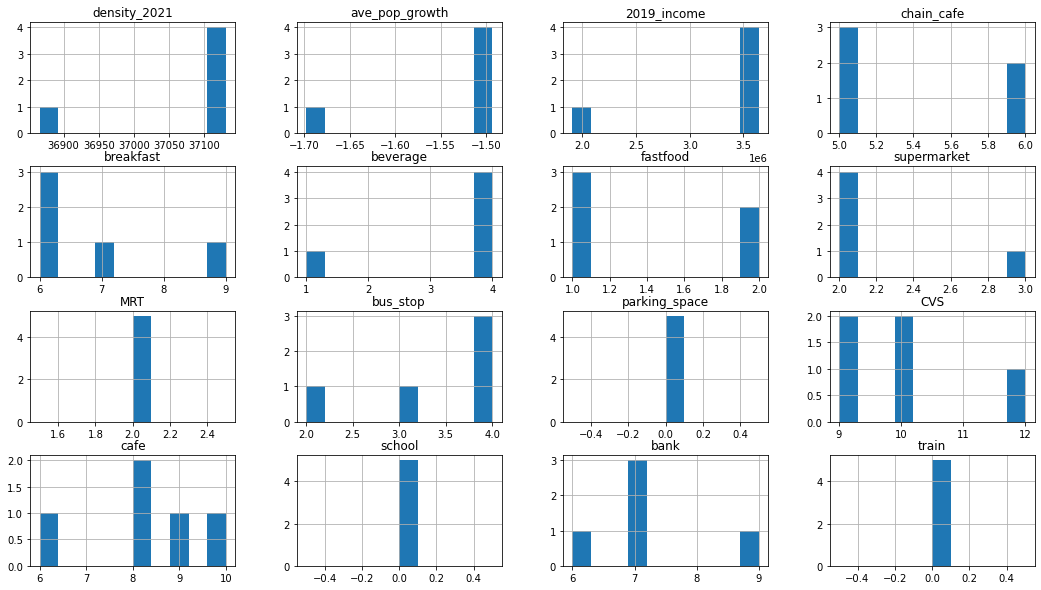

In [122]:
dfz_4.hist(figsize=(18, 10));

# 大部分人口密度(37131.21)
# 人口大多緩步負成長(-1.493150)
# 年收均值(3643217)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(6)
# 飲料店(4)
# 速食餐廳(1)
# 超市(2)
# 捷運(2)
# 停車場(0)
# CVS(1)
# cafe(8)
# school(0)
# 銀行(7)
# 火車站(0)
# 巴士站至少(4)站

In [123]:
dfz_5=feature_o[feature_o['labels'] == 5].loc[:,'density_2021':'train']
dfz_5.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.00000,5.0,5.000000,5.000000,5.0,5.0,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0
mean,25463.947878,-0.844685,1.932680e+06,4.20000,3.0,3.400000,1.800000,0.0,1.0,10.80000,2.400000,12.000000,4.800000,0.0,4.400000,1.0
std,8044.495961,0.679512,6.713666e+05,0.83666,0.0,0.894427,0.447214,0.0,0.0,2.04939,0.894427,2.738613,1.788854,0.0,1.949359,0.0
min,11625.129195,-1.758407,9.168990e+05,3.00000,3.0,2.000000,1.000000,0.0,1.0,9.00000,2.000000,9.000000,2.000000,0.0,1.000000,1.0
25%,27650.057475,-1.392464,1.566241e+06,4.00000,3.0,3.000000,2.000000,0.0,1.0,9.00000,2.000000,9.000000,4.000000,0.0,5.000000,1.0
50%,27650.057475,-0.357518,2.393420e+06,4.00000,3.0,4.000000,2.000000,0.0,1.0,10.00000,2.000000,14.000000,6.000000,0.0,5.000000,1.0
75%,27650.057475,-0.357518,2.393420e+06,5.00000,3.0,4.000000,2.000000,0.0,1.0,13.00000,2.000000,14.000000,6.000000,0.0,5.000000,1.0
max,32744.437768,-0.357518,2.393420e+06,5.00000,3.0,4.000000,2.000000,0.0,1.0,13.00000,4.000000,14.000000,6.000000,0.0,6.000000,1.0


In [124]:
feature_o[feature_o['labels'] == 5]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
55,cama,台北市松山區八德路四段668號,25.049865,121.576162,27650.057475,-0.357518,2393420,4,3.0,3.0,...,1.0,9.0,2.0,9.0,2.0,0.0,6.0,1.0,台北市松山,5
160,louisa,台北市南港區八德路四段786號,25.050500,121.580437,11625.129195,-1.392464,1566241,3,3.0,2.0,...,1.0,10.0,2.0,9.0,6.0,0.0,1.0,1.0,台北市南港,5
207,louisa,台北市松山區市民大道六段131號,25.049600,121.578755,27650.057475,-0.357518,2393420,5,3.0,4.0,...,1.0,13.0,2.0,14.0,6.0,0.0,5.0,1.0,台北市松山,5
209,louisa,台北市松山區市民大道六段131號1樓,25.049600,121.578755,27650.057475,-0.357518,2393420,5,3.0,4.0,...,1.0,13.0,2.0,14.0,6.0,0.0,5.0,1.0,台北市松山,5
398,stbks,台北市信義區松山路11號1樓,25.048456,121.578252,32744.437768,-1.758407,916899,4,3.0,4.0,...,1.0,9.0,4.0,14.0,4.0,0.0,5.0,1.0,台北市信義,5


In [125]:
dfz_5.median()

density_2021      2.765006e+04
ave_pop_growth   -3.575181e-01
2019_income       2.393420e+06
chain_cafe        4.000000e+00
breakfast         3.000000e+00
beverage          4.000000e+00
fastfood          2.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.000000e+01
parking_space     2.000000e+00
CVS               1.400000e+01
cafe              6.000000e+00
school            0.000000e+00
bank              5.000000e+00
train             1.000000e+00
dtype: float64

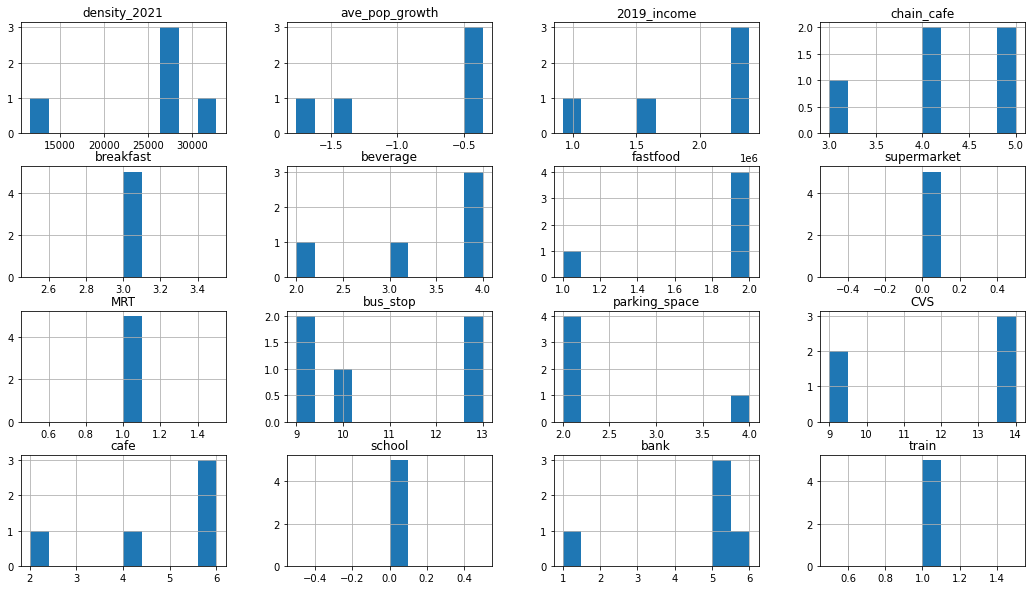

In [126]:
dfz_5.hist(figsize=(18, 10));

# 大部分人口密度(27650.06)
# 人口大多緩步負成長(-0.3575181)
# 年收均值(2393420)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(3)
# 飲料店(4)
# 速食餐廳(2)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(14)
# cafe(6)
# school(0)
# 銀行(5)
# 火車站(1)
# 巴士站至少(10)站

In [127]:
dfz_6=feature_o[feature_o['labels'] == 6].loc[:,'density_2021':'train']
dfz_6.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.00,4.0,4.00,4.0,4.0,4.0
mean,15641.543072,1.141744,3539135.0,4.0,4.0,4.25,1.0,0.0,1.0,126.5,2.75,2.0,1.25,1.0,1.5,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.50,0.0,0.0,0.0,9.0,0.50,0.0,0.50,0.0,1.0,0.0
min,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,113.0,2.00,2.0,1.00,1.0,1.0,0.0
25%,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,126.5,2.75,2.0,1.00,1.0,1.0,0.0
50%,15641.543072,1.141744,3539135.0,4.0,4.0,4.00,1.0,0.0,1.0,131.0,3.00,2.0,1.00,1.0,1.0,0.0
75%,15641.543072,1.141744,3539135.0,4.0,4.0,4.25,1.0,0.0,1.0,131.0,3.00,2.0,1.25,1.0,1.5,0.0
max,15641.543072,1.141744,3539135.0,4.0,4.0,5.00,1.0,0.0,1.0,131.0,3.00,2.0,2.00,1.0,3.0,0.0


In [128]:
feature_o[feature_o['labels'] == 6]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
65,cama,新北市板橋區南雅南路二段21號Ｂ1,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,6
300,louisa,新北市板橋區南雅南路二段130號,24.996782,121.451925,15641.543072,1.141744,3539135,4,4.0,5.0,...,1.0,113.0,2.0,2.0,2.0,1.0,3.0,0.0,新北市板橋,6
525,stbks,新北市板橋區南雅南路二段21號,24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,6
526,stbks,新北市板橋區南雅南路二段21號(亞東捷運站3號出口亞東醫院旁),24.997312,121.452312,15641.543072,1.141744,3539135,4,4.0,4.0,...,1.0,131.0,3.0,2.0,1.0,1.0,1.0,0.0,新北市板橋,6


In [129]:
dfz_6.median()

density_2021      1.564154e+04
ave_pop_growth    1.141744e+00
2019_income       3.539135e+06
chain_cafe        4.000000e+00
breakfast         4.000000e+00
beverage          4.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          1.310000e+02
parking_space     3.000000e+00
CVS               2.000000e+00
cafe              1.000000e+00
school            1.000000e+00
bank              1.000000e+00
train             0.000000e+00
dtype: float64

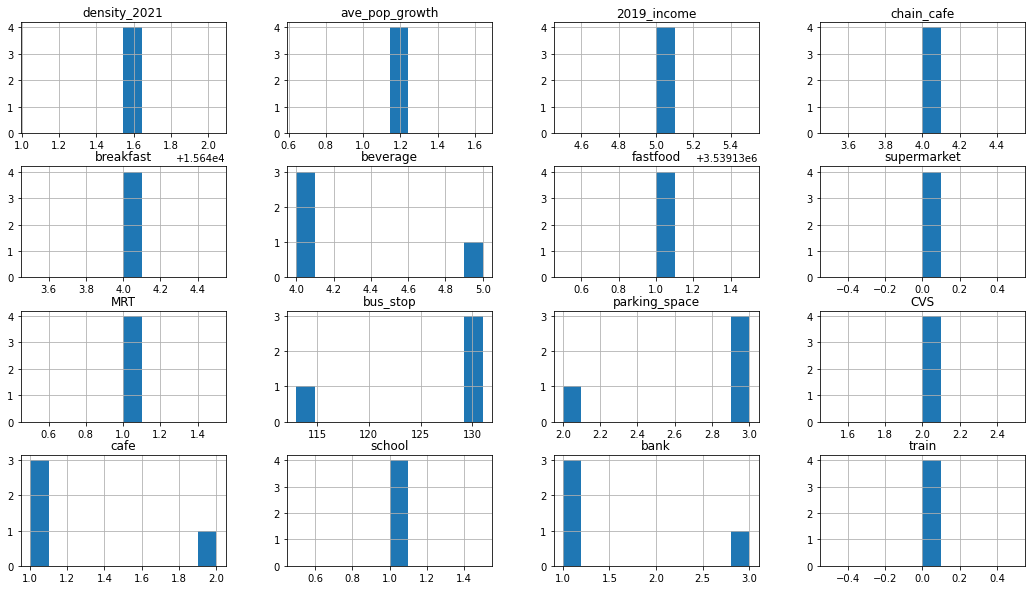

In [130]:
dfz_6.hist(figsize=(18, 10));

# 大部分人口密度(15641.54)
# 人口大多緩步負成長(1.141744)
# 年收均值(3539135)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(4)
# 飲料店(4)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(3)
# CVS(2)
# cafe(1)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(131)站

In [131]:
dfz_7=feature_o[feature_o['labels'] == 7].loc[:,'density_2021':'train']
dfz_7.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.000000,4.0,4.0,4.0,4.0,4.0,4.0
mean,31705.588030,0.809562,2693694.0,4.0,0.0,1.0,1.0,0.0,0.0,51.500000,1.0,5.5,1.0,0.0,4.0,1.0
std,14730.499255,1.134345,828636.0,0.0,0.0,0.0,0.0,0.0,0.0,4.041452,0.0,1.0,0.0,0.0,0.0,0.0
min,9609.839147,0.242390,1450740.0,4.0,0.0,1.0,1.0,0.0,0.0,48.000000,1.0,4.0,1.0,0.0,4.0,1.0
25%,31705.588030,0.242390,2693694.0,4.0,0.0,1.0,1.0,0.0,0.0,48.000000,1.0,5.5,1.0,0.0,4.0,1.0
50%,39070.837657,0.242390,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,51.500000,1.0,6.0,1.0,0.0,4.0,1.0
75%,39070.837657,0.809562,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,55.000000,1.0,6.0,1.0,0.0,4.0,1.0
max,39070.837657,2.511079,3108012.0,4.0,0.0,1.0,1.0,0.0,0.0,55.000000,1.0,6.0,1.0,0.0,4.0,1.0


In [132]:
feature_o[feature_o['labels'] == 7]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
72,cama,新北市汐止區新台五路一段99號B1,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,55.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,7
331,louisa,新北市汐止區新北市汐止區新台五路一段75號B1,25.061182,121.645750,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,48.0,1.0,4.0,1.0,0.0,4.0,1.0,新北市汐止,7
558,stbks,新北市汐止區新台五路一段94號1樓,25.060718,121.648416,9609.839147,2.511079,1450740,4,0.0,1.0,...,0.0,48.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,7
559,stbks,新北市汐止區新台五路一段99號,25.061620,121.648248,39070.837657,0.242390,3108012,4,0.0,1.0,...,0.0,55.0,1.0,6.0,1.0,0.0,4.0,1.0,新北市汐止,7


In [133]:
dfz_7.median()

density_2021      3.907084e+04
ave_pop_growth    2.423895e-01
2019_income       3.108012e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          5.150000e+01
parking_space     1.000000e+00
CVS               6.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              4.000000e+00
train             1.000000e+00
dtype: float64

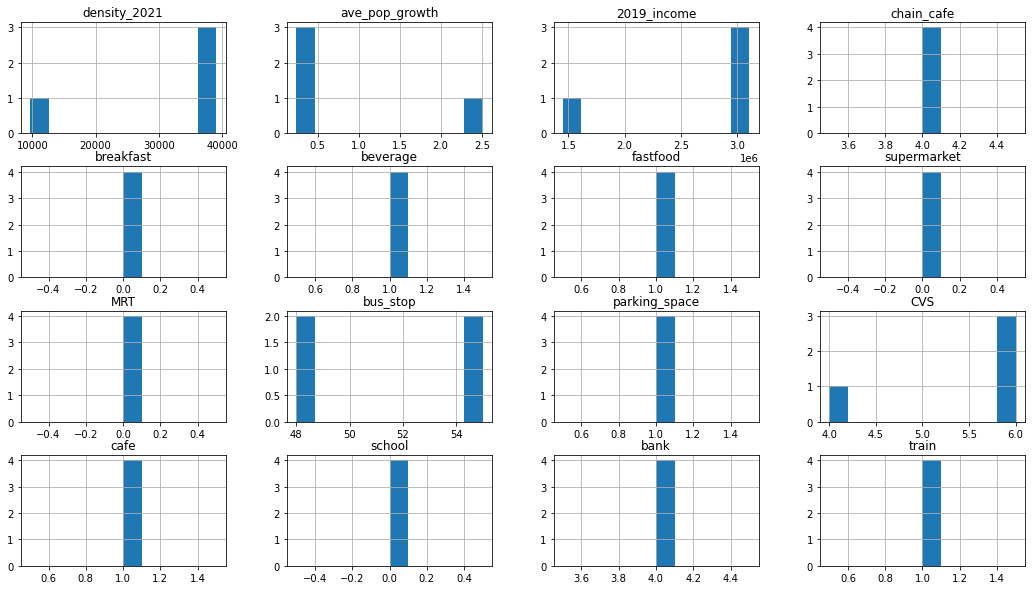

In [134]:
dfz_7.hist(figsize=(18, 10));

# 大部分人口密度(39070.84)
# 人口大多緩步負成長(0.2423895)
# 年收均值(3108012)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(1)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(6)
# cafe(1)
# school(0)
# 銀行(4)
# 火車站(1)
# 巴士站至少(51.5)站

In [135]:
dfz_8=feature_o[feature_o['labels'] == 8].loc[:,'density_2021':'train']
dfz_8.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,6.000000,6.000000e+00,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.00000,6.0
mean,5734.296784,5.857702e-01,1631191.0,10.666667,0.333333,5.500000,10.833333,0.0,2.0,51.166667,1.500000,27.500000,5.333333,0.0,11.00000,1.0
std,0.000000,1.216188e-16,0.0,0.816497,0.516398,1.760682,0.752773,0.0,0.0,5.845226,0.547723,2.880972,0.816497,0.0,8.14862,0.0
min,5734.296784,5.857702e-01,1631191.0,10.000000,0.000000,3.000000,10.000000,0.0,2.0,42.000000,1.000000,24.000000,4.000000,0.0,3.00000,1.0
25%,5734.296784,5.857702e-01,1631191.0,10.000000,0.000000,4.250000,10.250000,0.0,2.0,49.250000,1.000000,25.250000,5.000000,0.0,3.75000,1.0
50%,5734.296784,5.857702e-01,1631191.0,10.500000,0.000000,6.000000,11.000000,0.0,2.0,50.500000,1.500000,27.500000,5.500000,0.0,10.00000,1.0
75%,5734.296784,5.857702e-01,1631191.0,11.000000,0.750000,7.000000,11.000000,0.0,2.0,55.500000,2.000000,29.750000,6.000000,0.0,17.00000,1.0
max,5734.296784,5.857702e-01,1631191.0,12.000000,1.000000,7.000000,12.000000,0.0,2.0,58.000000,2.000000,31.000000,6.000000,0.0,22.00000,1.0


In [136]:
feature_o[feature_o['labels'] == 8]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
121,louisa,台北市中正區忠孝西路一段38號B1-B櫃,25.046215,121.516436,5734.296784,0.58577,1631191,10,0.0,7.0,...,2.0,57.0,1.0,30.0,5.0,0.0,14.0,1.0,台北市中正,8
125,louisa,台北市中正區忠孝西路一段50號1樓,25.046303,121.515823,5734.296784,0.58577,1631191,10,1.0,7.0,...,2.0,42.0,1.0,31.0,6.0,0.0,22.0,1.0,台北市中正,8
371,stbks,台北市中正區忠孝西路一段49號B1,25.047066,121.517670,5734.296784,0.58577,1631191,11,0.0,3.0,...,2.0,49.0,2.0,24.0,5.0,0.0,3.0,1.0,台北市中正,8
373,stbks,台北市中正區南陽街1號2F,25.045715,121.516229,5734.296784,0.58577,1631191,10,1.0,7.0,...,2.0,58.0,1.0,29.0,6.0,0.0,18.0,1.0,台北市中正,8
380,stbks,台北市中正區北平西路3號2樓,25.047176,121.517058,5734.296784,0.58577,1631191,11,0.0,4.0,...,2.0,50.0,2.0,25.0,4.0,0.0,3.0,1.0,台北市中正,8
384,stbks,台北市中正區忠孝西路一段47號B1,25.046880,121.516761,5734.296784,0.58577,1631191,12,0.0,5.0,...,2.0,51.0,2.0,26.0,6.0,0.0,6.0,1.0,台北市中正,8


In [137]:
dfz_8.median()

density_2021      5.734297e+03
ave_pop_growth    5.857702e-01
2019_income       1.631191e+06
chain_cafe        1.050000e+01
breakfast         0.000000e+00
beverage          6.000000e+00
fastfood          1.100000e+01
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          5.050000e+01
parking_space     1.500000e+00
CVS               2.750000e+01
cafe              5.500000e+00
school            0.000000e+00
bank              1.000000e+01
train             1.000000e+00
dtype: float64

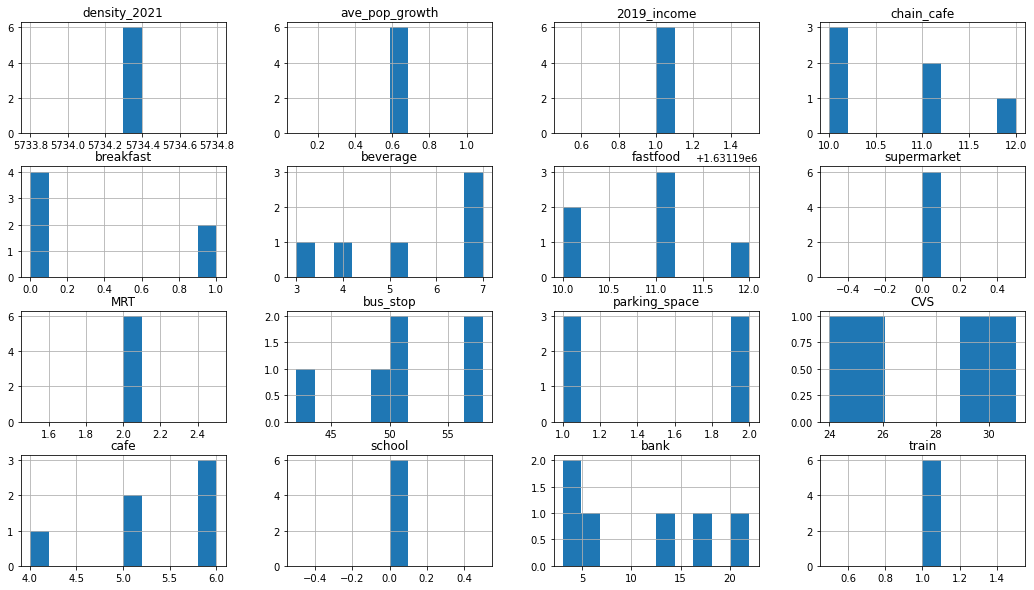

In [138]:
dfz_8.hist(figsize=(18, 10));

# 大部分人口密度(5734.297)
# 人口大多緩步負成長(0.5857702)
# 年收均值(1631191)
# 平均有(10.5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(6)
# 速食餐廳(11)
# 超市(0)
# 捷運(2)
# 停車場(1.5)
# CVS(27.5)
# cafe(5.5)
# school(0)
# 銀行(10)
# 火車站(1)
# 巴士站至少(50.5)站

In [139]:
dfz_9=feature_o[feature_o['labels'] == 9].loc[:,'density_2021':'train']
dfz_9.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.000000e+00,5.00000,5.000000,5.000000,5.000000,5.000000,5.0,5.00000,5.000000,5.000000,5.000000,5.0,5.000000,5.0
mean,26141.952483,-0.768126,4.814803e+06,4.80000,0.200000,1.800000,4.200000,0.400000,2.0,16.80000,2.000000,13.200000,12.000000,0.0,21.000000,0.0
std,4552.691547,0.532931,1.404520e+06,0.83666,0.447214,1.095445,0.447214,0.547723,0.0,6.26099,1.414214,0.447214,3.741657,0.0,2.345208,0.0
min,21085.129310,-1.142284,2.723005e+06,4.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,0.000000,13.000000,8.000000,0.0,17.000000,0.0
25%,21224.915953,-1.142284,3.990206e+06,4.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,2.000000,13.000000,10.000000,0.0,21.000000,0.0
50%,29466.572383,-1.142284,5.786935e+06,5.00000,0.000000,1.000000,4.000000,0.000000,2.0,14.00000,2.000000,13.000000,10.000000,0.0,22.000000,0.0
75%,29466.572383,-0.414378,5.786935e+06,5.00000,0.000000,3.000000,4.000000,1.000000,2.0,14.00000,2.000000,13.000000,16.000000,0.0,22.000000,0.0
max,29466.572383,0.000600,5.786935e+06,6.00000,1.000000,3.000000,5.000000,1.000000,2.0,28.00000,4.000000,14.000000,16.000000,0.0,23.000000,0.0


In [140]:
feature_o[feature_o['labels'] == 9]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
90,louisa,台北市南京東路三段256巷20弄2號,25.050653,121.544800,29466.572383,-1.142284,5786935,4,0.0,1.0,...,2.0,14.0,0.0,14.0,8.0,0.0,21.0,0.0,台北市南京東路三段256巷20弄2號,9
101,louisa,台北市中山區遼寧街112號,25.052610,121.541998,21224.915953,-0.414378,2723005,5,0.0,1.0,...,2.0,28.0,4.0,13.0,16.0,0.0,22.0,0.0,台北市中山,9
210,louisa,台北市松山區慶城街14-1號,25.053151,121.545272,29466.572383,-1.142284,5786935,4,1.0,3.0,...,2.0,14.0,2.0,13.0,10.0,0.0,17.0,0.0,台北市松山,9
365,stbks,台北市中山區南京東路三段224號1F,25.051659,121.543728,21085.129310,0.000600,3990206,5,0.0,1.0,...,2.0,14.0,2.0,13.0,10.0,0.0,23.0,0.0,台北市中山,9
477,stbks,台北市松山區慶城街1號1樓,25.052761,121.544632,29466.572383,-1.142284,5786935,6,0.0,3.0,...,2.0,14.0,2.0,13.0,16.0,0.0,22.0,0.0,台北市松山,9


In [141]:
dfz_9.median()

density_2021      2.946657e+04
ave_pop_growth   -1.142284e+00
2019_income       5.786935e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          4.000000e+00
supermarket       0.000000e+00
MRT               2.000000e+00
bus_stop          1.400000e+01
parking_space     2.000000e+00
CVS               1.300000e+01
cafe              1.000000e+01
school            0.000000e+00
bank              2.200000e+01
train             0.000000e+00
dtype: float64

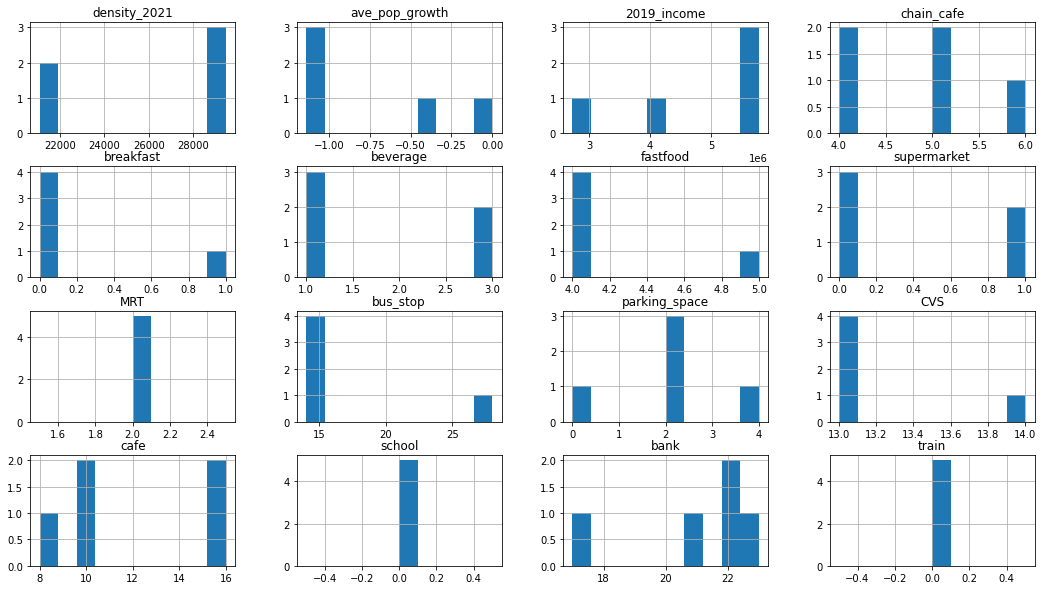

In [142]:
dfz_9.hist(figsize=(18, 10));

# 大部分人口密度(29466.57)
# 人口大多緩步負成長(-1.142284)
# 年收均值(5786935)
# 平均有(0)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(4)
# 速食餐廳(0)
# 超市(0)
# 捷運(1)
# 停車場(2)
# CVS(13)
# cafe(10)
# school(0)
# 銀行(22)
# 火車站(0)
# 巴士站至少(14)站

In [143]:
dfz_10=feature_o[feature_o['labels'] == 10].loc[:,'density_2021':'train']
dfz_10.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.00,4.0,4.00,4.00,4.00,4.0,4.0,4.000000,4.0,4.00000,4.0,4.0,4.0,4.0
mean,15551.797664,2.212973,672421.75,4.0,0.75,2.75,0.75,0.0,1.0,103.250000,4.5,5.50000,0.0,1.0,1.0,0.0
std,6364.359242,1.417858,262252.50,0.0,0.50,0.50,0.50,0.0,0.0,10.210289,1.0,0.57735,0.0,0.0,0.0,0.0
min,6005.258800,0.086185,279043.00,4.0,0.00,2.00,0.00,0.0,1.0,91.000000,3.0,5.00000,0.0,1.0,1.0,0.0
25%,15551.797664,2.212973,672421.75,4.0,0.75,2.75,0.75,0.0,1.0,100.000000,4.5,5.00000,0.0,1.0,1.0,0.0
50%,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,103.000000,5.0,5.50000,0.0,1.0,1.0,0.0
75%,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,106.250000,5.0,6.00000,0.0,1.0,1.0,0.0
max,18733.977285,2.921902,803548.00,4.0,1.00,3.00,1.00,0.0,1.0,116.000000,5.0,6.00000,0.0,1.0,1.0,0.0


In [144]:
feature_o[feature_o['labels'] == 10]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
269,louisa,新北市新店區北宜路一段26號,24.957101,121.537961,18733.977285,2.921902,803548,4,0.0,2.0,...,1.0,116.0,3.0,6.0,0.0,1.0,1.0,0.0,新北市新店,10
509,stbks,新北市新店區北宜路一段2號,24.957871,121.537784,18733.977285,2.921902,803548,4,1.0,3.0,...,1.0,103.0,5.0,5.0,0.0,1.0,1.0,0.0,新北市新店,10
510,stbks,新北市新店區北宜路一段2號2F,24.957871,121.537784,18733.977285,2.921902,803548,4,1.0,3.0,...,1.0,103.0,5.0,5.0,0.0,1.0,1.0,0.0,新北市新店,10
627,85 cafe,新北市新店區北宜路1段9號,24.958817,121.538472,6005.258800,0.086185,279043,4,1.0,3.0,...,1.0,91.0,5.0,6.0,0.0,1.0,1.0,0.0,新北市新店,10


In [145]:
dfz_10.median()

density_2021       18733.977285
ave_pop_growth         2.921902
2019_income       803548.000000
chain_cafe             4.000000
breakfast              1.000000
beverage               3.000000
fastfood               1.000000
supermarket            0.000000
MRT                    1.000000
bus_stop             103.000000
parking_space          5.000000
CVS                    5.500000
cafe                   0.000000
school                 1.000000
bank                   1.000000
train                  0.000000
dtype: float64

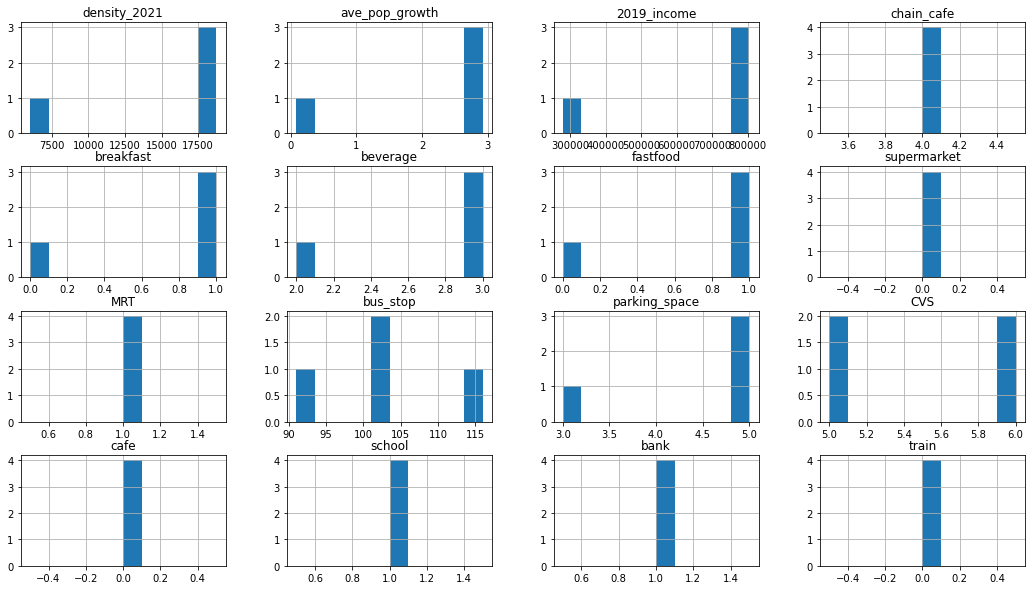

In [146]:
dfz_10.hist(figsize=(18, 10));

# 大部分人口密度(18733.977285)
# 人口大多緩步負成長(2.921902)
# 年收均值(803548)
# 平均有(4)間小型咖啡廳
# 沒有早餐店(1)
# 飲料店(3)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(5)
# CVS(5.5)
# cafe(0)
# school(1)
# 銀行(1)
# 火車站(0)
# 巴士站至少(103)站

In [147]:
dfz_11=feature_o[feature_o['labels'] == 11].loc[:,'density_2021':'train']
dfz_11.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.000000e+00,4.0,4.00,4.0,4.0,4.00,4.0,4.000000,4.00000,4.000000,4.00000,4.0,4.000000,4.0
mean,19615.152560,6.111772,2.819733e+06,2.0,2.75,0.0,0.0,0.75,0.0,41.500000,5.50000,3.000000,1.50000,0.0,2.500000,0.0
std,5990.044868,0.933330,1.247161e+06,0.0,1.50,0.0,0.0,0.50,0.0,6.350853,0.57735,1.414214,0.57735,0.0,1.914854,0.0
min,14427.621534,5.303485,1.739660e+06,2.0,2.00,0.0,0.0,0.00,0.0,36.000000,5.00000,2.000000,1.00000,0.0,1.000000,0.0
25%,14427.621534,5.303485,1.739660e+06,2.0,2.00,0.0,0.0,0.75,0.0,36.000000,5.00000,2.000000,1.00000,0.0,1.000000,0.0
50%,19615.152560,6.111772,2.819733e+06,2.0,2.00,0.0,0.0,1.00,0.0,41.500000,5.50000,2.500000,1.50000,0.0,2.000000,0.0
75%,24802.683585,6.920059,3.899806e+06,2.0,2.75,0.0,0.0,1.00,0.0,47.000000,6.00000,3.500000,2.00000,0.0,3.500000,0.0
max,24802.683585,6.920059,3.899806e+06,2.0,5.00,0.0,0.0,1.00,0.0,47.000000,6.00000,5.000000,2.00000,0.0,5.000000,0.0


In [148]:
feature_o[feature_o['labels'] == 11]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
261,louisa,新北市土城區中央路二段61巷37號,24.978330,121.444961,24802.683585,6.920059,1739660,2,2.0,0.0,...,0.0,36.0,6.0,5.0,1.0,0.0,1.0,0.0,新北市土城,11
277,louisa,新北市新莊區中原東路127號,25.054209,121.461225,14427.621534,5.303485,3899806,2,2.0,0.0,...,0.0,36.0,5.0,2.0,2.0,0.0,3.0,0.0,新北市新莊,11
504,stbks,新北市土城區學府路二段210號1F,24.978764,121.445127,24802.683585,6.920059,1739660,2,2.0,0.0,...,0.0,47.0,6.0,3.0,1.0,0.0,1.0,0.0,新北市土城,11
520,stbks,新北市新莊區思源路448號,25.053550,121.460218,14427.621534,5.303485,3899806,2,5.0,0.0,...,0.0,47.0,5.0,2.0,2.0,0.0,5.0,0.0,新北市新莊,11


In [149]:
dfz_11.median()

density_2021      1.961515e+04
ave_pop_growth    6.111772e+00
2019_income       2.819733e+06
chain_cafe        2.000000e+00
breakfast         2.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       1.000000e+00
MRT               0.000000e+00
bus_stop          4.150000e+01
parking_space     5.500000e+00
CVS               2.500000e+00
cafe              1.500000e+00
school            0.000000e+00
bank              2.000000e+00
train             0.000000e+00
dtype: float64

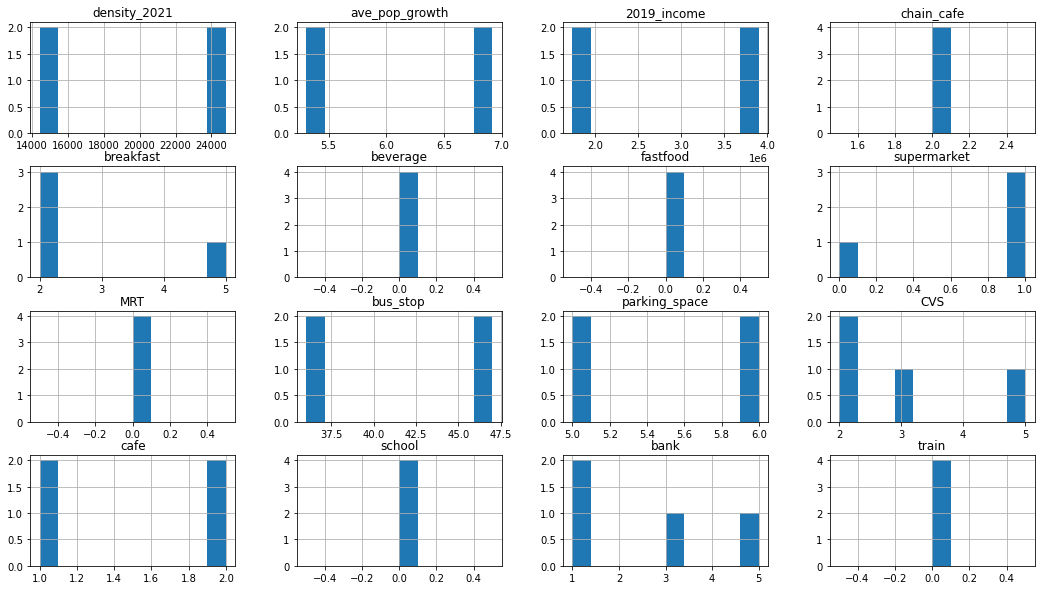

In [150]:
dfz_11.hist(figsize=(18, 10));

# 大部分人口密度(19615.15)
# 人口成長(6.111772)
# 年收均值(2819733)
# 平均有(2)間小型咖啡廳
# 早餐店(2)
# 飲料店(0)
# 速食餐廳(0)
# 超市(1)
# 捷運(0)
# 停車場(5.5)
# CVS(2.5)
# cafe(1.5)
# school(0)
# 銀行(2)
# 火車站(0)
# 巴士站至少(41.5)站

In [152]:
dfz_12=feature_o[feature_o['labels'] == 12].loc[:,'density_2021':'train']
dfz_12.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
25%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
50%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
75%,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0
max,20359.211077,0.441679,3018264.0,5.0,0.0,0.0,1.0,0.0,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0


In [153]:
feature_o[feature_o['labels'] == 12]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
293,louisa,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,12
533,stbks,新北市板橋區縣民大道二段7號1F,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,12
534,stbks,新北市板橋區縣民大道二段7號B1,25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,12
535,stbks,新北市板橋區縣民大道二段7號B1 (捷運3A出口),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,12
536,stbks,新北市板橋區縣民大道二段7號B1(近台鐵及高鐵入口處),25.01433,121.463635,20359.211077,0.441679,3018264,5,0.0,0.0,...,1.0,216.0,7.0,12.0,3.0,0.0,8.0,1.0,新北市板橋,12


In [154]:
dfz_12.median()

density_2021      2.035921e+04
ave_pop_growth    4.416789e-01
2019_income       3.018264e+06
chain_cafe        5.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               1.000000e+00
bus_stop          2.160000e+02
parking_space     7.000000e+00
CVS               1.200000e+01
cafe              3.000000e+00
school            0.000000e+00
bank              8.000000e+00
train             1.000000e+00
dtype: float64

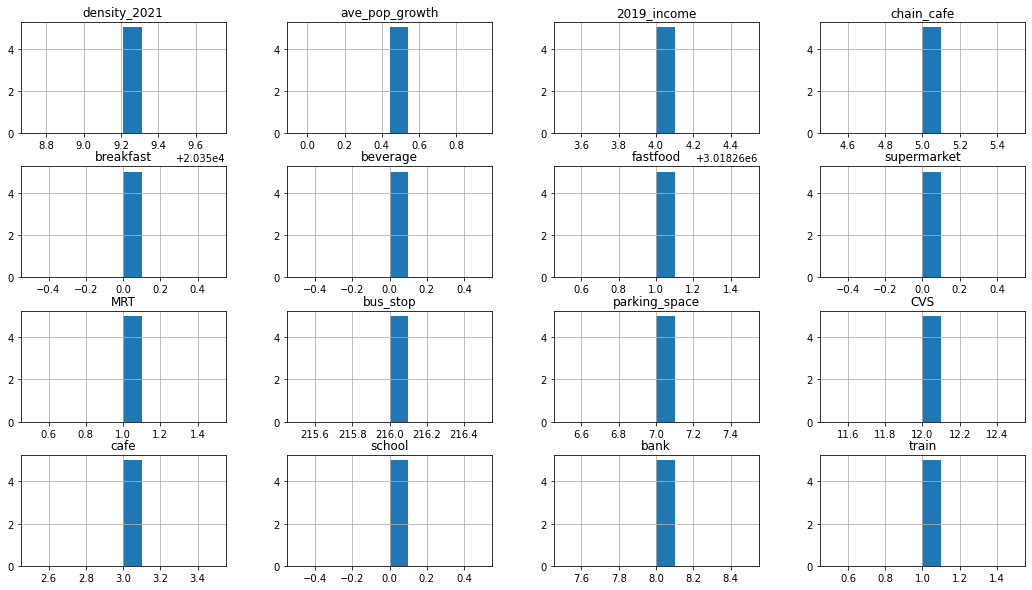

In [155]:
dfz_12.hist(figsize=(18, 10));

# 大部分人口密度(20359.21)
# 人口大多緩步負成長(0.4416789)
# 年收均值(3018264)
# 平均有(5)間小型咖啡廳
# 沒有早餐店(0)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(1)
# 停車場(7)
# CVS(12)
# cafe(3)
# school(0)
# 銀行(8)
# 火車站(1)
# 巴士站至少(216)站

In [156]:
dfz_13=feature_o[feature_o['labels'] == 13].loc[:,'density_2021':'train']
dfz_13.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,5.000000e+00,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.0
mean,6.952097e+03,10.359882,10578817.0,3.400000,0.400000,0.0,0.200000,1.400000,0.0,166.400000,1.200000,2.800000,1.0,0.0,2.400000,0.0
std,1.016846e-12,0.000000,0.0,1.341641,0.547723,0.0,0.447214,0.894427,0.0,42.347373,1.095445,0.447214,0.0,0.0,0.894427,0.0
min,6.952097e+03,10.359882,10578817.0,1.000000,0.000000,0.0,0.000000,0.000000,0.0,107.000000,0.000000,2.000000,1.0,0.0,1.000000,0.0
25%,6.952097e+03,10.359882,10578817.0,4.000000,0.000000,0.0,0.000000,1.000000,0.0,136.000000,0.000000,3.000000,1.0,0.0,2.000000,0.0
50%,6.952097e+03,10.359882,10578817.0,4.000000,0.000000,0.0,0.000000,2.000000,0.0,194.000000,2.000000,3.000000,1.0,0.0,3.000000,0.0
75%,6.952097e+03,10.359882,10578817.0,4.000000,1.000000,0.0,0.000000,2.000000,0.0,194.000000,2.000000,3.000000,1.0,0.0,3.000000,0.0
max,6.952097e+03,10.359882,10578817.0,4.000000,1.000000,0.0,1.000000,2.000000,0.0,201.000000,2.000000,3.000000,1.0,0.0,3.000000,0.0


In [157]:
feature_o[feature_o['labels'] == 13]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
306,louisa,新北市林口區文化三路一段2號4樓,25.066147,121.361399,6952.09652,10.359882,10578817,1,0.0,0.0,...,0.0,107.0,0.0,3.0,1.0,0.0,2.0,0.0,新北市林口,13
307,louisa,新北市林口區忠孝一路12號,25.073093,121.364383,6952.09652,10.359882,10578817,4,1.0,0.0,...,0.0,201.0,2.0,3.0,1.0,0.0,3.0,0.0,新北市林口,13
541,stbks,新北市林口區文化三路一段356號,25.071241,121.363547,6952.09652,10.359882,10578817,4,1.0,0.0,...,0.0,136.0,0.0,2.0,1.0,0.0,1.0,0.0,新北市林口,13
542,stbks,新北市林口區文化三路一段359 號,25.072814,121.364907,6952.09652,10.359882,10578817,4,0.0,0.0,...,0.0,194.0,2.0,3.0,1.0,0.0,3.0,0.0,新北市林口,13
543,stbks,新北市林口區文化三路一段359號,25.072814,121.364907,6952.09652,10.359882,10578817,4,0.0,0.0,...,0.0,194.0,2.0,3.0,1.0,0.0,3.0,0.0,新北市林口,13


In [158]:
dfz_13.median()

density_2021      6.952097e+03
ave_pop_growth    1.035988e+01
2019_income       1.057882e+07
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          0.000000e+00
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          1.940000e+02
parking_space     2.000000e+00
CVS               3.000000e+00
cafe              1.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

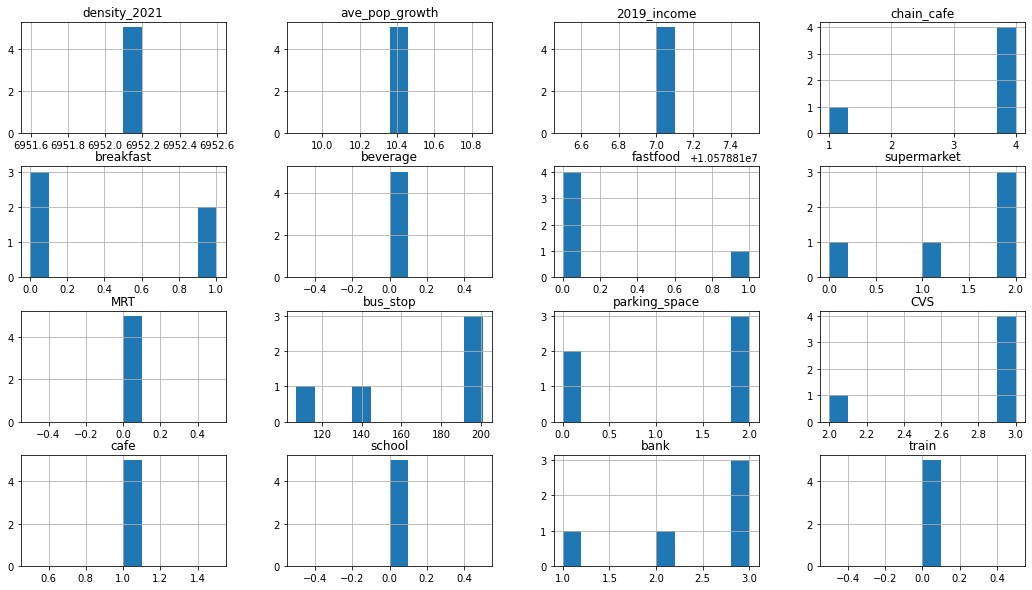

In [159]:
dfz_13.hist(figsize=(18, 10));

# 大部分人口密度(6952.097)
# 人口大多緩步負成長(10.35988)
# 年收均值(10578820)
# 平均有(4)間小型咖啡廳
# 早餐店(0)
# 飲料店(0)
# 速食餐廳(0)
# 超市(2)
# 捷運(0)
# 停車場(2)
# CVS(3)
# cafe(1)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(194)站

In [160]:
dfz_14=feature_o[feature_o['labels'] == 14].loc[:,'density_2021':'train']
dfz_14.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,3.000000,3.000000,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0
mean,9650.283273,6.065478,9703793.0,2.333333,2.0,0.0,0.666667,0.0,0.0,177.333333,0.666667,3.666667,1.666667,0.0,0.0,0.0
std,0.000000,0.000000,0.0,1.154701,0.0,0.0,0.577350,0.0,0.0,35.795717,0.577350,0.577350,0.577350,0.0,0.0,0.0
min,9650.283273,6.065478,9703793.0,1.000000,2.0,0.0,0.000000,0.0,0.0,136.000000,0.000000,3.000000,1.000000,0.0,0.0,0.0
25%,9650.283273,6.065478,9703793.0,2.000000,2.0,0.0,0.500000,0.0,0.0,167.000000,0.500000,3.500000,1.500000,0.0,0.0,0.0
50%,9650.283273,6.065478,9703793.0,3.000000,2.0,0.0,1.000000,0.0,0.0,198.000000,1.000000,4.000000,2.000000,0.0,0.0,0.0
75%,9650.283273,6.065478,9703793.0,3.000000,2.0,0.0,1.000000,0.0,0.0,198.000000,1.000000,4.000000,2.000000,0.0,0.0,0.0
max,9650.283273,6.065478,9703793.0,3.000000,2.0,0.0,1.000000,0.0,0.0,198.000000,1.000000,4.000000,2.000000,0.0,0.0,0.0


In [161]:
feature_o[feature_o['labels'] == 14]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
310,louisa,新北市林口區信義路162號1樓,25.080204,121.379212,9650.283273,6.065478,9703793,1,2.0,0.0,...,0.0,136.0,0.0,3.0,1.0,0.0,0.0,0.0,新北市林口,14
544,stbks,新北市林口區文化二路一段551號,25.077230,121.374582,9650.283273,6.065478,9703793,3,2.0,0.0,...,0.0,198.0,1.0,4.0,2.0,0.0,0.0,0.0,新北市林口,14
545,stbks,新北市林口區文化二路一段551號(家樂福隔壁),25.077230,121.374582,9650.283273,6.065478,9703793,3,2.0,0.0,...,0.0,198.0,1.0,4.0,2.0,0.0,0.0,0.0,新北市林口,14


In [162]:
dfz_14.median()

density_2021      9.650283e+03
ave_pop_growth    6.065478e+00
2019_income       9.703793e+06
chain_cafe        3.000000e+00
breakfast         2.000000e+00
beverage          0.000000e+00
fastfood          1.000000e+00
supermarket       0.000000e+00
MRT               0.000000e+00
bus_stop          1.980000e+02
parking_space     1.000000e+00
CVS               4.000000e+00
cafe              2.000000e+00
school            0.000000e+00
bank              0.000000e+00
train             0.000000e+00
dtype: float64

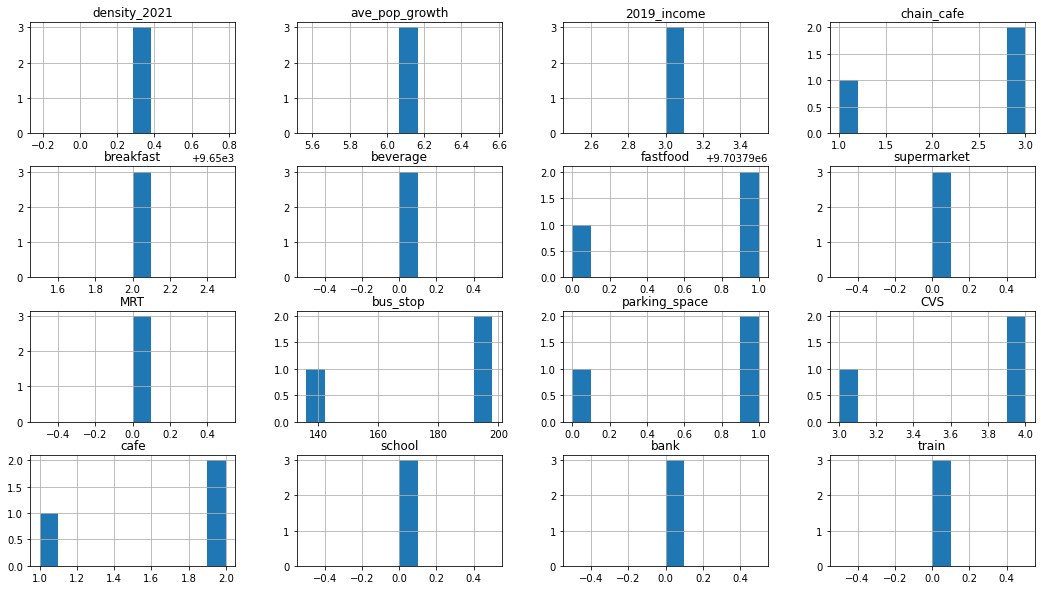

In [163]:
dfz_14.hist(figsize=(18, 10));

# 大部分人口密度(9650.283)
# 人口大多緩步負成長(6.065478)
# 年收均值(9703793)
# 平均有(3)間小型咖啡廳
# 早餐店(2)
# 飲料店(0)
# 速食餐廳(1)
# 超市(0)
# 捷運(0)
# 停車場(1)
# CVS(4)
# cafe(2)
# school(0)
# 銀行(0)
# 火車站(0)
# 巴士站至少(198)站

In [164]:
dfz_15=feature_o[feature_o['labels'] == 15].loc[:,'density_2021':'train']
dfz_15.describe()

,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,fastfood,supermarket,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train
count,4.000000,4.000000,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.00,4.0,4.0,4.0,4.0,4.0,4.0
mean,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.25,4.0,5.0,0.0,0.0,3.0,0.0
std,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0
min,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
25%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
50%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.00,4.0,5.0,0.0,0.0,3.0,0.0
75%,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,159.25,4.0,5.0,0.0,0.0,3.0,0.0
max,11953.402777,0.838682,5934044.0,4.0,0.0,1.0,0.0,2.0,0.0,160.00,4.0,5.0,0.0,0.0,3.0,0.0


In [165]:
feature_o[feature_o['labels'] == 15]

,brand,addr,lat,long,density_2021,ave_pop_growth,2019_income,chain_cafe,breakfast,beverage,...,MRT,bus_stop,parking_space,CVS,cafe,school,bank,train,zone,labels
317,louisa,新北市樹林區大雅路282號,24.947306,121.379956,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,160.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,15
429,stbks,台北市士林區振興街37號,24.947638,121.379931,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,台北市士林,15
548,stbks,新北市樹林區大雅路288號,24.947600,121.379874,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,15
549,stbks,新北市樹林區家樂福北大店大雅路288號,24.947667,121.379910,11953.402777,0.838682,5934044,4,0.0,1.0,...,0.0,159.0,4.0,5.0,0.0,0.0,3.0,0.0,新北市樹林,15


In [166]:
dfz_15.median()

density_2021      1.195340e+04
ave_pop_growth    8.386823e-01
2019_income       5.934044e+06
chain_cafe        4.000000e+00
breakfast         0.000000e+00
beverage          1.000000e+00
fastfood          0.000000e+00
supermarket       2.000000e+00
MRT               0.000000e+00
bus_stop          1.590000e+02
parking_space     4.000000e+00
CVS               5.000000e+00
cafe              0.000000e+00
school            0.000000e+00
bank              3.000000e+00
train             0.000000e+00
dtype: float64

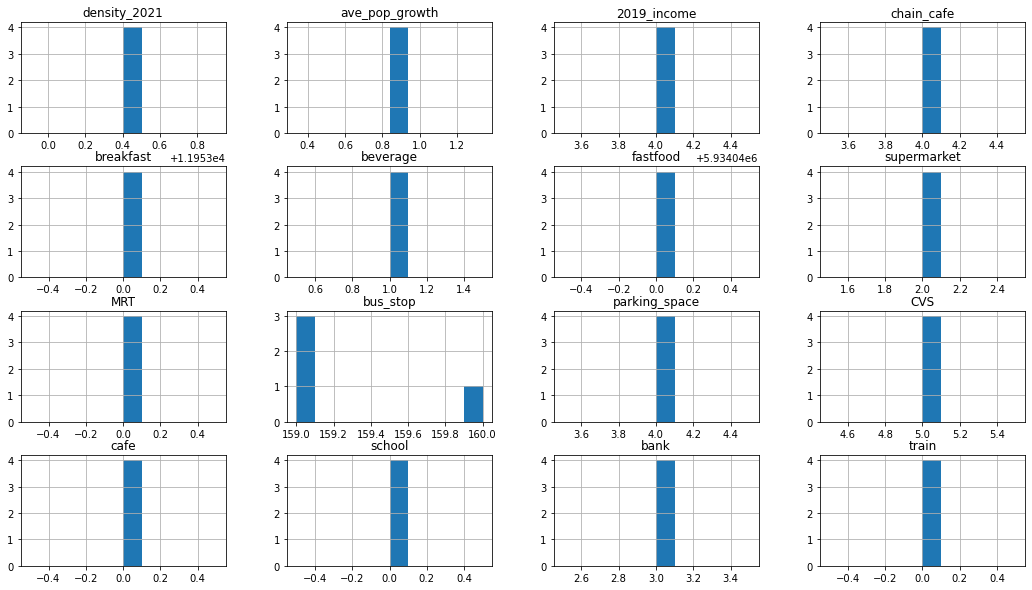

In [167]:
dfz_15.hist(figsize=(18, 10));

# 大部分人口密度(11953.40)
# 人口大多緩步負成長(0.8386823)
# 年收均值(5934044)
# 平均有(4)間小型咖啡廳
# 早餐店(0)
# 飲料店(1)
# 速食餐廳(0)
# 超市(2)
# 捷運(0)
# 停車場(4)
# CVS(5)
# cafe(0)
# school(0)
# 銀行(3)
# 火車站(0)
# 巴士站至少(159)站